<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/5450_Project_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

Which features affect "Life expectancy at birth, total (years)" across different countries and socio economic conditions ('High income', 'Middle income','Low income' etc.)?

# Business Impact

Life expectancy prediction using health, nutrition, and population statistics holds immense business value across multiple sectors like healthcare, economics, policy, technology, and social services. The ability to predict life expectancy allows both businesses and governments to proactively respond to health trends, allocate resources efficiently, and create targeted interventions to improve public health. It also supports the design of products and services that cater to specific population needs, ultimately enhancing business performance and the well-being of the society as a whole.

# Installing New Libraries

In [1]:
!pip install wooldridge

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 28.6 MB/s eta 0:00:00


In [2]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.5 MB/s eta 0:00:00


In [3]:
!pip install mplcursors

In [4]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a979b5ea6153108e78d11eae7b3eb8125e4deb950915d9b0aebf4354e3e40ac2
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


# Importing Libraries

In [183]:
# imports
import pandas as pd
import copy
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from ydata_profiling import ProfileReport
import kagglehub
import itertools
import mplcursors
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import linearmodels
import wooldridge as woo
import statsmodels.stats.diagnostic as smsdia
from statsmodels.stats.stattools import durbin_watson
import statsmodels.formula.api as smf

# Reading Data from Kaggle

In [7]:
# Download latest version
path = kagglehub.dataset_download("theworldbank/health-nutrition-and-population-statistics")

print("Path to dataset files:", path)

health_df = pd.read_csv(path + '/data.csv')
orig_health_df = copy.deepcopy(health_df)

100%|██████████| 14.0M/14.0M [00:01<00:00, 8.51MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/theworldbank/health-nutrition-and-population-statistics/versions/1


In [8]:
health_df.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name     Indicator Code  \
0  % of females ages 15-49 having comprehensive c...  SH.HIV.KNOW.FE.ZS   
1  % of males ages 15-49 having comprehensive cor...  SH.HIV.KNOW.MA.ZS   
2  Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
3  Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL   
4  Adults (ages 15+) and children (ages 0-14) new...     SH.HIV.INCD.TL   

         1960        1961        1962        1963        1964        1965  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2  133.555013  134.159119  134.857912  134.504576  134.105211  133.569626   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   ...       2007       2008       2009       2010       2011       2012  \
0  ...        NaN        NaN        NaN        NaN        NaN        NaN   
1  ...        NaN        NaN        NaN        NaN        NaN        NaN   
2  ...  49.999851  49.887046  49.781207  49.672975  49.536047  49.383745   
3  ...        NaN        NaN        NaN        NaN        NaN        NaN   
4  ...        NaN        NaN        NaN        NaN        NaN        NaN   

        2013       2014  2015  Unnamed: 60  
0        NaN        NaN   NaN          NaN  
1        NaN        NaN   NaN          NaN  
2  48.796558  48.196418   NaN          NaN  
3        NaN        NaN   NaN          NaN  
4        NaN        NaN   NaN          NaN  

[5 rows x 61 columns]

# Helper Functions

In [9]:
def get_vif(df):
    vif = pd.DataFrame()
    vif["Features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [10]:
def plot_results(df_test_and_predicted, model):
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_test_and_predicted['Year'], df_test_and_predicted['Actual'], label='True Values') # Access the 'Actual' column data
    plt.plot(df_test_and_predicted['Year'], df_test_and_predicted['Predicted'], label='Predictions', linestyle='dashed') # Access the 'Predicted' column data
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
    plt.title(f'{model} Panel Data Prediction')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.show()

In [11]:
def compare_actual_vs_predicted(X_test, y_test, y_pred, model):
    df_actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_actual_vs_predicted['Model'] = model
    result_df = pd.DataFrame(np.hstack((np.array(X_2_test), np.array(df_actual_vs_predicted))))
    result_df.columns = X_test.columns.tolist() + ['Actual', 'Predicted', 'Model']
    result_df['Country Name'] = result_df['Country Code'].apply(lambda x: country_dict[x])
    return df_actual_vs_predicted, result_df

In [12]:
def plot_kpi(df, x_col, y_col, hue_col):
    title_val = kpi_dict.get(y_col, y_col)
    fig = px.line(df, x=x_col, y=y_col, color=hue_col, title=title_val)
    fig.update_traces(mode="markers+lines", hovertemplate=None)
    fig.update_layout(hovermode="x")
    fig.show()

In [13]:
def show_unique_values(df):
    for e in zip(df.columns, df.dtypes):
        col_name, col_dtype = e
        if col_dtype == 'object':
            unique_values = df[col_name].unique()
            print(f"Unique values for column '{col_name}' are {unique_values}")
            print("---------------------------------------------------------------------")

In [14]:
def show_null_values(df):
    df_len = len(df)
    for col in df.columns:
        total_col_null_values = df[col].isnull().sum()
        pct_null_values = np.round(100 * (total_col_null_values / df_len), 2)
        print(f"Column '{col}' has {pct_null_values}% null values ({total_col_null_values} out of {df_len}).")
        print("---------------------------------------------------------------------")

In [15]:
def show_null_values_per_country(df, ind_col, col, country):
    df_len = len(df)
    total_col_null_values = df[col].isnull().sum()
    pct_null_values = np.round(100 * (total_col_null_values / df_len), 2)
    print(f"For country {country} indicator column '{ind_col}' has {pct_null_values}% null values ({total_col_null_values} out of {df_len}).")
    print("---------------------------------------------------------------------")

In [16]:
def show_zero_values_per_indicator(df, ind_col):
    df_len = len(df)
    total_col_zero_values = df[ind_col].isin([0]).sum()
    pct_zero_values = np.round(100 * (total_col_zero_values / df_len), 2)
    print(f"For indicator column '{ind_col}' has {pct_zero_values}% zero values ({total_col_zero_values} out of {df_len}).")
    print("---------------------------------------------------------------------")
    return pct_zero_values

In [17]:
def show_zero_values_per_ctry_indicator(df, ind_col, ctry):
    df_len = len(df[df['Country Name'] == ctry])
    total_col_zero_values = df[df['Country Name'] == ctry][ind_col].isin([0]).sum()
    pct_zero_values = np.round(100 * (total_col_zero_values / df_len), 2)
    print(f"For country {ctry}, indicator column '{ind_col}' has {pct_zero_values}% zero values ({total_col_zero_values} out of {df_len}).")
    print("---------------------------------------------------------------------")

In [18]:
def impute_data(df, ctry, kpi, fill_method):
    df = df[df['Country Name'] == ctry][[kpi]]
    #df[kpi] = df[kpi].replace(0, np.nan)
    if fill_method == 'knn':
        #scaler = MinMaxScaler()
        #df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
        imputer = KNNImputer(n_neighbors=2)
        df[kpi] = imputer.fit_transform(df[[kpi]])
    elif fill_method == 'ffill':
        df.ffill(axis = 0, inplace=True)
    elif fill_method == 'ffill':
        df.ffill(axis = 0, inplace=True)
    elif fill_method == 'bfill':
        df.bfill(axis = 0, inplace=True)
    elif fill_method == 'mean':
        df.fillna(df.mean(), inplace=True)
    return list(itertools.chain(*df.values.tolist()))

# Exploratory Data Analysis

In [19]:
health_df.shape

(89010, 61)

In [20]:
health_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')

In [21]:
health_df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2012              float64
2013              float64
2014              float64
2015              float64
Unnamed: 60       float64
Length: 61, dtype: object

In [22]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

In [23]:
ind_name_list = list(health_df['Indicator Name'].unique())
len(ind_name_list)

345

In [24]:
#Checking if all the countries have same number of KPIs
health_df.groupby(['Country Name']).agg({'Indicator Name' : np.size}).sort_values(by='Indicator Name', ascending=False)

Indicator Name
Country Name                                  
Zimbabwe                                   345
Afghanistan                                345
St. Martin (French part)                   345
St. Vincent and the Grenadines             345
Sub-Saharan Africa                         345
...                                        ...
Angola                                     345
Antigua and Barbuda                        345
Arab World                                 345
Argentina                                  345
Armenia                                    345

[258 rows x 1 columns]

# Data Processing

In [25]:
kpi_dict = dict(zip(health_df['Indicator Code'], health_df['Indicator Name']))

In [26]:
year_cols = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
             '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
             '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
             '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'
            ]

In [27]:
# Droppinmg unnamed columns
health_df.drop(columns=['Unnamed: 60'], inplace=True)
# replacing NaN with 0
for col in year_cols:
       health_df[col] = health_df[col].fillna(0)

The data set contains both countries and conglomereate of multiple countries captured as regions.
We are only extracing countries.

In [28]:
country_name_list = ['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
                     'Andorra', 'Angola', 'Antigua and Barbuda','Argentina',
                     'Armenia', 'Aruba', 'Australia', 'Austria','Azerbaijan',
                     'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
                     'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
                     'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
                     'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
                     'Bulgaria', 'Burkina Faso', 'Burundi',
                     'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
                     'Cayman Islands', 'Central African Republic', 'Chad',
                     'Channel Islands', 'Chile', 'China', 'Colombia',
                     'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
                     "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
                     'Czech Republic',
                     'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
                     'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
                     'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
                     'Faroe Islands', 'Fiji', 'Finland', 'France',
                     'French Polynesia',
                     'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana',
                     'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guam',
                     'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
                     'Haiti', 'Honduras', 'Hong Kong SAR, China', 'Hungary',
                     'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.',
                     'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy',
                     'Jamaica', 'Japan', 'Jordan',
                     'Kazakhstan', 'Kenya', 'Kiribati', 'Korea, Dem. People’s Rep.',
                     'Korea, Rep.', 'Kosovo', 'Kuwait', 'Kyrgyz Republic',
                     'Lao PDR', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia',
                     'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg',
                     'Macao SAR, China', 'Macedonia, FYR', 'Madagascar', 'Malawi',
                     'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands',
                     'Mauritania', 'Mauritius', 'Mexico', 'Micronesia, Fed. Sts.',
                     'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
                     'Mozambique', 'Myanmar',
                     'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia',
                     'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
                     'Northern Mariana Islands', 'Norway',
                     'Oman',
                     'Pakistan', 'Palau', 'Panama', 'Papua New Guinea',
                     'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
                     'Puerto Rico',
                     'Qatar',
                     'Romania', 'Russian Federation', 'Rwanda',
                     'Samoa', 'San Marino', 'Sao Tome and Principe',
                     'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
                     'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)',
                     'Slovak Republic', 'Slovenia', 'Solomon Islands',
                     'Somalia', 'South Africa', 'South Sudan', 'Spain',
                     'Sri Lanka', 'St. Kitts and Nevis', 'St. Lucia',
                     'St. Martin (French part)', 'St. Vincent and the Grenadines',
                     'Sudan', 'Suriname', 'Swaziland', 'Sweden', 'Switzerland',
                     'Syrian Arab Republic',
                     'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste',
                     'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia','Turkey',
                     'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu',
                     'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
                     'United States', 'Uruguay', 'Uzbekistan',
                     'Vanuatu', 'Venezuela, RB', 'Vietnam', 'Virgin Islands (U.S.)',
                     'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'
                     ]

We are now selecting only country specific data from the original data set.

In [29]:
country_year_health_df = health_df[health_df['Country Name'].isin(country_name_list)].reset_index(drop=True)
country_year_health_df.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                      Indicator Name     Indicator Code  \
0  % of females ages 15-49 having comprehensive c...  SH.HIV.KNOW.FE.ZS   
1  % of males ages 15-49 having comprehensive cor...  SH.HIV.KNOW.MA.ZS   
2  Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
3  Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL   
4  Adults (ages 15+) and children (ages 0-14) new...     SH.HIV.INCD.TL   

      1960     1961     1962     1963     1964     1965  ...       2006  \
0    0.000    0.000    0.000    0.000    0.000    0.000  ...     0.0000   
1    0.000    0.000    0.000    0.000    0.000    0.000  ...     0.0000   
2  145.321  145.321  145.321  145.321  145.321  145.321  ...   123.1616   
3    0.000    0.000    0.000    0.000    0.000    0.000  ...  3300.0000   
4    0.000    0.000    0.000    0.000    0.000    0.000  ...   500.0000   

      2007       2008       2009       2010       2011      2012       2013  \
0     0.00     0.0000     0.0000     0.0000     1.5000     0.000     0.0000   
1     0.00     0.0000     0.0000     0.0000     0.0000     0.000     0.0000   
2   117.39   111.4708   105.5516    99.6324    93.7132    87.794    82.2638   
3  3500.00  3800.0000  4200.0000  4500.0000  4900.0000  5300.000  5900.0000   
4  1000.00  1000.0000  1000.0000  1000.0000  1000.0000  1000.000  1000.0000   

        2014    2015  
0     0.0000     0.0  
1     0.0000     0.0  
2    76.7336     0.0  
3  6400.0000  6900.0  
4  1000.0000  1000.0  

[5 rows x 60 columns]

## Formatting the Data

Formatting the dataset from long to wide format so that we have data for all KPIs for each country and year in the same row. This will help us to apply time series and panel data regression later.

In [30]:
'''
Formatting the dataframe structure.
In the original dataframe, the data is laid out for each country-kpi, data is
present in each row across the years.
In the new format, we are placing all the kpis for a country in a single row.
There will be multiple rows for each country pertaining to each year
ranging from 1960 thru 2015.
'''
comb_list = [list(country_year_health_df['Country Name'].unique())] + [year_cols]
result = list(itertools.product(*comb_list))
df_x = pd.DataFrame(result, columns=['Country Name', 'Year'])
for col in country_year_health_df['Indicator Code'].unique():
    df_x[col] = 0
df_x.set_index(['Country Name', 'Year'], inplace=True)
df_x.reset_index(inplace=True)
col_list = list(df_x.columns)

# Create an empty list to store the DataFrames
all_dfs = []
for ctry in country_year_health_df['Country Name'].unique():
    temp_df = country_year_health_df[country_year_health_df['Country Name'] == ctry].iloc[:, 3:].T
    series_names = temp_df.iloc[0, :]
    temp_df = temp_df.iloc[1:, :]
    temp_df.columns = series_names
    temp_df['Country Name'] = ctry
    temp_df.reset_index(inplace=True)
    temp_df.rename(columns={'index' : 'Year'}, inplace=True)
    temp_df = temp_df[col_list]

    # Append the temp_df to the list instead of using append
    all_dfs.append(temp_df)

# Concatenate all DataFrames in the list outside the loop
df_x = pd.concat(all_dfs, ignore_index=True)

<ipython-input-30-3a7555b5af9e>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_x[col] = 0
<ipython-input-30-3a7555b5af9e>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_x[col] = 0
<ipython-input-30-3a7555b5af9e>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_x[col] = 0
<ipython-inpu

In [31]:
df_x.head(50)

Indicator Code Country Name  Year SH.HIV.KNOW.FE.ZS SH.HIV.KNOW.MA.ZS  \
0               Afghanistan  1960               0.0               0.0   
1               Afghanistan  1961               0.0               0.0   
2               Afghanistan  1962               0.0               0.0   
3               Afghanistan  1963               0.0               0.0   
4               Afghanistan  1964               0.0               0.0   
5               Afghanistan  1965               0.0               0.0   
6               Afghanistan  1966               0.0               0.0   
7               Afghanistan  1967               0.0               0.0   
8               Afghanistan  1968               0.0               0.0   
9               Afghanistan  1969               0.0               0.0   
10              Afghanistan  1970               0.0               0.0   
11              Afghanistan  1971               0.0               0.0   
12              Afghanistan  1972               0.0               0.0   
13              Afghanistan  1973               0.0               0.0   
14              Afghanistan  1974               0.0               0.0   
15              Afghanistan  1975               0.0               0.0   
16              Afghanistan  1976               0.0               0.0   
17              Afghanistan  1977               0.0               0.0   
18              Afghanistan  1978               0.0               0.0   
19              Afghanistan  1979               0.0               0.0   
20              Afghanistan  1980               0.0               0.0   
21              Afghanistan  1981               0.0               0.0   
22              Afghanistan  1982               0.0               0.0   
23              Afghanistan  1983               0.0               0.0   
24              Afghanistan  1984               0.0               0.0   
25              Afghanistan  1985               0.0               0.0   
26              Afghanistan  1986               0.0               0.0   
27              Afghanistan  1987               0.0               0.0   
28              Afghanistan  1988               0.0               0.0   
29              Afghanistan  1989               0.0               0.0   
30              Afghanistan  1990               0.0               0.0   
31              Afghanistan  1991               0.0               0.0   
32              Afghanistan  1992               0.0               0.0   
33              Afghanistan  1993               0.0               0.0   
34              Afghanistan  1994               0.0               0.0   
35              Afghanistan  1995               0.0               0.0   
36              Afghanistan  1996               0.0               0.0   
37              Afghanistan  1997               0.0               0.0   
38              Afghanistan  1998               0.0               0.0   
39              Afghanistan  1999               0.0               0.0   
40              Afghanistan  2000               0.0               0.0   
41              Afghanistan  2001               0.0               0.0   
42              Afghanistan  2002               0.0               0.0   
43              Afghanistan  2003               0.0               0.0   
44              Afghanistan  2004               0.0               0.0   
45              Afghanistan  2005               0.0               0.0   
46              Afghanistan  2006               0.0               0.0   
47              Afghanistan  2007               0.0               0.0   
48              Afghanistan  2008               0.0               0.0   
49              Afghanistan  2009               0.0               0.0   

Indicator Code SP.ADO.TFRT SH.HIV.TOTL SH.HIV.INCD.TL SH.DYN.AIDS SH.HIV.INCD  \
0                  145.321         0.0            0.0         0.0         0.0   
1                  145.321         0.0            0.0         0.0         0.0   
2                  145.321       

In [32]:
df_x.shape

(12152, 347)

In [33]:
series_names = df_x.columns[2:]

In [34]:
# Checking % of data populated per country.
for series in series_names:
    print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.HIV.KNOW.FE.ZS Indicator Code        SH.HIV.KNOW.FE.ZS
Country Name                           
Afghanistan                         1.5
Albania                            34.0
Algeria                            21.4
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                 15.6
Yemen, Rep.                         1.3
Zambia                            113.4
Zimbabwe                          217.8

[217 rows x 1 columns]
SH.HIV.KNOW.MA.ZS Indicator Code        SH.HIV.KNOW.MA.ZS
Country Name                           
Afghanistan                         0.0
Albania                            20.3
Algeria                             0.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.DYN.AIDS Indicator Code        SH.DYN.AIDS
Country Name                     
Afghanistan               72000.0
Albania                       0.0
Algeria                  100600.0
American Samoa                0.0
Andorra                       0.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.              103300.0
Zambia                 21430000.0
Zimbabwe               33280000.0

[217 rows x 1 columns]
SH.HIV.INCD Indicator Code        SH.HIV.INCD
Country Name                     
Afghanistan               15400.0
Albania                       0.0
Algeria                   17000.0
American Samoa                0.0
Andorra                       0.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.               18200.0
Zambia                  1716000.0
Zimbabwe                2762000.0

[217 rows x 1 columns]
SP.DYN.SMAM.FE Indicator Code        SP.DYN.

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.AG00.FE.IN Indicator Code        SP.POP.AG00.FE.IN
Country Name                           
Afghanistan                  17907197.0
Albania                       1607024.0
Algeria                      19140106.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           59697.0
West Bank and Gaza            1534644.0
Yemen, Rep.                  13655819.0
Zambia                        9136112.0
Zimbabwe                      9373661.0

[217 rows x 1 columns]
SP.POP.AG00.MA.IN Indicator Code        SP.POP.AG00.MA.IN
Country Name                           
Afghanistan                  18714838.0
Albania                       1713504.0
Algeria                      19920880.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           63088.0
West Bank and Gaza            1602582.0
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.AG05.MA.IN Indicator Code        SP.POP.AG05.MA.IN
Country Name                           
Afghanistan                  15534468.0
Albania                       1683267.0
Algeria                      17820359.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           50627.0
West Bank and Gaza            1412676.0
Yemen, Rep.                  11918375.0
Zambia                        7564548.0
Zimbabwe                      8184947.0

[217 rows x 1 columns]
SP.POP.AG06.FE.IN Indicator Code        SP.POP.AG06.FE.IN
Country Name                           
Afghanistan                  14218216.0
Albania                       1586249.0
Algeria                      16802461.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           48780.0
West Bank and Gaza            1320527.0
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.AG17.FE.IN Indicator Code        SP.POP.AG17.FE.IN
Country Name                           
Afghanistan                   9428580.0
Albania                       1476137.0
Algeria                      14337873.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           43801.0
West Bank and Gaza             967081.0
Yemen, Rep.                   7933185.0
Zambia                        4928096.0
Zimbabwe                      6010100.0

[217 rows x 1 columns]
SP.POP.AG17.MA.IN Indicator Code        SP.POP.AG17.MA.IN
Country Name                           
Afghanistan                  10015674.0
Albania                       1540651.0
Algeria                      14911077.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           42603.0
West Bank and Gaza            1003402.0
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.AG24.FE.IN Indicator Code        SP.POP.AG24.FE.IN
Country Name                           
Afghanistan                   7181429.0
Albania                       1226763.0
Algeria                      12308350.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           36081.0
West Bank and Gaza             738002.0
Yemen, Rep.                   5901236.0
Zambia                        3842746.0
Zimbabwe                      4799678.0

[217 rows x 1 columns]
SP.POP.AG24.MA.IN Indicator Code        SP.POP.AG24.MA.IN
Country Name                           
Afghanistan                   7697984.0
Albania                       1258512.0
Algeria                      12656651.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           32187.0
West Bank and Gaza             760274.0
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co


SP.REG.BRTH.ZS Indicator Code        SP.REG.BRTH.ZS
Country Name                        
Afghanistan                     43.4
Albania                        196.6
Algeria                        199.0
American Samoa                   0.0
Andorra                        100.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza             294.6
Yemen, Rep.                     69.8
Zambia                          35.3
Zimbabwe                       193.0

[217 rows x 1 columns]
SP.REG.BRTH.RU.ZS Indicator Code        SP.REG.BRTH.RU.ZS
Country Name                           
Afghanistan                        37.4
Albania                           196.4
Algeria                           198.7
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                295.0
Yemen, Rep.                        51.0
Zambia               

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.STA.ORCF.ZS Indicator Code        SH.STA.ORCF.ZS
Country Name                        
Afghanistan                     47.5
Albania                        164.3
Algeria                         65.7
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza              81.5
Yemen, Rep.                    146.9
Zambia                         203.5
Zimbabwe                       263.2

[217 rows x 1 columns]
SH.STA.ORTH Indicator Code        SH.STA.ORTH
Country Name                     
Afghanistan                 163.8
Albania                     129.6
Algeria                172.500001
American Samoa                0.0
Andorra                       0.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza           62.9
Yemen, Rep.                 145.1
Zambia                      481.0
Zimbabwe                    309.8

[217 rows x 1 columns]
SH

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.6064.FE Indicator Code        SP.POP.6064.FE
Country Name                        
Afghanistan                7186724.0
Albania                    2301754.0
Algeria                   14585799.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       102788.0
West Bank and Gaza          607134.0
Yemen, Rep.                5978242.0
Zambia                     3808244.0
Zimbabwe                   4242068.0

[217 rows x 1 columns]
SP.POP.6569.FE Indicator Code        SP.POP.6569.FE
Country Name                        
Afghanistan                5106732.0
Albania                    1899809.0
Algeria                   11578498.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)        80612.0
West Bank and Gaza          454855.0
Yemen, Rep.                4301032.0
Zambia                     2885080.0
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.IMM.IDPT Indicator Code        SH.IMM.IDPT
Country Name                     
Afghanistan                1298.0
Albania                    3467.0
Algeria                    2737.0
American Samoa                0.0
Andorra                    1830.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.                1842.0
Zambia                     2680.0
Zimbabwe                   2720.0

[217 rows x 1 columns]
SH.IMM.HEPB Indicator Code        SH.IMM.HEPB
Country Name                     
Afghanistan                 614.0
Albania                    1567.0
Algeria                    1089.0
American Samoa                0.0
Andorra                    1430.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.                 951.0
Zambia                      921.0
Zimbabwe                   1273.0

[217 rows x 1 columns]
SH.IMM.HIB3 Indicator Code        SH.IMM.HIB

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.HIV.INCD.ZS Indicator Code        SH.HIV.INCD.ZS
Country Name                        
Afghanistan                     0.26
Albania                          0.0
Algeria                         0.26
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                     0.26
Zambia                         39.79
Zimbabwe                       60.22

[217 rows x 1 columns]
SH.TBS.INCD Indicator Code        SH.TBS.INCD
Country Name                     
Afghanistan                4728.0
Albania                     530.0
Algeria                    2005.0
American Samoa              237.5
Andorra                     512.8
...                           ...
Virgin Islands (U.S.)       184.7
West Bank and Gaza          197.6
Yemen, Rep.                2437.0
Zambia                    16663.0
Zimbabwe                  11647.0

[217 rows x 1 columns]
SH

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.DYN.LE00.IN Indicator Code        SP.DYN.LE00.IN
Country Name                        
Afghanistan              2577.927585
Albania                  3918.571049
Algeria                  3412.900293
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)    4020.706683
West Bank and Gaza       1770.969488
Yemen, Rep.              2883.976146
Zambia                   2670.722171
Zimbabwe                  2915.55622

[217 rows x 1 columns]
SH.MMR.RISK.ZS Indicator Code        SH.MMR.RISK.ZS
Country Name                        
Afghanistan               169.280289
Albania                     2.535658
Algeria                    13.688123
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza          11.56423
Yemen, Rep.                72.080193
Zambia                     65.103177
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SE.ADT.1524.LT.ZS Indicator Code        SE.ADT.1524.LT.ZS
Country Name                           
Afghanistan                  135.211302
Albania                      495.318146
Algeria                      446.764046
American Samoa                97.654213
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza          1188.498611
Yemen, Rep.                  316.710728
Zambia                       449.212379
Zimbabwe                     367.113968

[217 rows x 1 columns]
SH.STA.BRTW.ZS Indicator Code        SH.STA.BRTW.ZS
Country Name                        
Afghanistan                      0.0
Albania                         18.2
Algeria                         13.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza              25.0
Yemen, Rep.                     63.9
Zambia          

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.2024.MA Indicator Code        SP.POP.2024.MA
Country Name                        
Afghanistan               41514360.0
Albania                    6690247.0
Algeria                   66900827.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       172369.0
West Bank and Gaza         3864869.0
Yemen, Rep.               33377814.0
Zambia                    20723100.0
Zimbabwe                  25480742.0

[217 rows x 1 columns]
SP.POP.2529.MA Indicator Code        SP.POP.2529.MA
Country Name                        
Afghanistan               34525488.0
Albania                    5698782.0
Algeria                   57486015.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       159119.0
West Bank and Gaza         3141846.0
Yemen, Rep.               25992079.0
Zambia                    16998491.0
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.7579.MA Indicator Code        SP.POP.7579.MA
Country Name                        
Afghanistan                1650007.0
Albania                     895427.0
Algeria                    4950417.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)        28846.0
West Bank and Gaza          148709.0
Yemen, Rep.                1612544.0
Zambia                      943016.0
Zimbabwe                   1330424.0

[217 rows x 1 columns]
SP.POP.80UP.MA Indicator Code        SP.POP.80UP.MA
Country Name                        
Afghanistan                 925780.0
Albania                     693012.0
Algeria                    3728372.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)        24440.0
West Bank and Gaza           95328.0
Yemen, Rep.                1204557.0
Zambia                      621233.0
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.STA.MMRT Indicator Code        SH.STA.MMRT
Country Name                     
Afghanistan               24112.0
Albania                    1071.0
Algeria                    4344.0
American Samoa                0.0
Andorra                       0.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza         1905.0
Yemen, Rep.               11710.0
Zambia                    11366.0
Zimbabwe                  13056.0

[217 rows x 1 columns]
SH.STA.MMRT.NE Indicator Code        SH.STA.MMRT.NE
Country Name                        
Afghanistan                   1930.0
Albania                        113.4
Algeria                        117.4
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                    906.0
Zambia                        3576.0
Zimbabwe                      5554.0

[217 rows x 1 columns]
SH

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.DYN.NMRT Indicator Code        SH.DYN.NMRT
Country Name                     
Afghanistan                1132.9
Albania                     263.7
Algeria                     505.3
American Samoa                0.0
Andorra                      60.5
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza          418.8
Yemen, Rep.                 880.0
Zambia                      782.6
Zimbabwe                    584.6

[217 rows x 1 columns]
SH.DYN.MORT Indicator Code        SH.DYN.MORT
Country Name                     
Afghanistan               11397.0
Albania                    1399.3
Algeria                    6334.0
American Samoa                0.0
Andorra                     121.6
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza         1874.0
Yemen, Rep.                9199.7
Zambia                     8760.3
Zimbabwe                   5677.4

[217 rows x 1 columns]
SH.DYN.MORT.FE Indicator Code        SH.DYN.

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.DTH.NMRT Indicator Code        SH.DTH.NMRT
Country Name                     
Afghanistan             1032070.0
Albania                   14150.0
Algeria                  378096.0
American Samoa                0.0
Andorra                      37.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza        50554.0
Yemen, Rep.              626144.0
Zambia                   366005.0
Zimbabwe                 257075.0

[217 rows x 1 columns]
SN.ITK.DEFC Indicator Code         SN.ITK.DEFC
Country Name                      
Afghanistan            198900000.0
Albania                        0.0
Algeria                 47400000.0
American Samoa                 0.0
Andorra                        0.0
...                            ...
Virgin Islands (U.S.)          0.0
West Bank and Gaza             0.0
Yemen, Rep.            135700000.0
Zambia                 127500000.0
Zimbabwe               127300000.0

[217 rows x 1 columns]
SH.SGR.PROC.P5 Indicator Code  

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.MED.PHYS.ZS Indicator Code        SH.MED.PHYS.ZS
Country Name                        
Afghanistan                 3.000472
Albania                    35.718074
Algeria                     9.835662
American Samoa                1.5533
Andorra                       33.838
...                              ...
Virgin Islands (U.S.)          3.295
West Bank and Gaza             1.337
Yemen, Rep.                 2.658804
Zambia                      1.772187
Zimbabwe                    2.045896

[217 rows x 1 columns]
SP.POP.0004.FE.5Y Indicator Code        SP.POP.0004.FE.5Y
Country Name                           
Afghanistan                 1045.063969
Albania                      626.815218
Algeria                      828.280605
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        625.275428
West Bank and Gaza           449.744849
Yemen, Rep.                 1022.772945
Zambia                

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.0509.MA.5Y Indicator Code        SP.POP.0509.MA.5Y
Country Name                           
Afghanistan                  844.321588
Albania                      623.990511
Algeria                      751.825941
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        582.808071
West Bank and Gaza           397.505645
Yemen, Rep.                  867.552469
Zambia                       866.673999
Zimbabwe                     850.042367

[217 rows x 1 columns]
SP.POP.1014.FE.5Y Indicator Code        SP.POP.1014.FE.5Y
Country Name                           
Afghanistan                  703.235533
Albania                      593.882698
Algeria                      661.212995
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        524.121553
West Bank and Gaza           339.403024
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

Indicator Code        SP.POP.1564.TO
Country Name                        
Afghanistan              469906210.0
Albania                   91993131.0
Algeria                  787333238.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)      3183690.0
West Bank and Gaza        42848620.0
Yemen, Rep.              367703846.0
Zambia                   228889963.0
Zimbabwe                 274267417.0

[217 rows x 1 columns]
SP.POP.2024.FE.5Y Indicator Code        SP.POP.2024.FE.5Y
Country Name                           
Afghanistan                   484.45452
Albania                      485.896652
Algeria                       520.71782
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        411.642555
West Bank and Gaza           239.145587
Yemen, Rep.                  487.447328
Zambia                       495.4548

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.5559.FE.5Y Indicator Code        SP.POP.5559.FE.5Y
Country Name                           
Afghanistan                  119.597175
Albania                      203.380476
Algeria                      145.847965
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        248.840817
West Bank and Gaza            49.993293
Yemen, Rep.                  124.980582
Zambia                       118.801195
Zimbabwe                     114.807309

[217 rows x 1 columns]
SP.POP.5559.MA.5Y Indicator Code        SP.POP.5559.MA.5Y
Country Name                           
Afghanistan                  115.997787
Albania                      210.435338
Algeria                      136.841027
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        248.798784
West Bank and Gaza            49.463134
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.7579.FE.5Y Indicator Code        SP.POP.7579.FE.5Y
Country Name                           
Afghanistan                   22.151012
Albania                       79.494405
Algeria                       43.377566
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)          77.57147
West Bank and Gaza            12.038817
Yemen, Rep.                   29.841823
Zambia                        28.215113
Zimbabwe                      34.910774

[217 rows x 1 columns]
SP.POP.7579.MA.5Y Indicator Code        SP.POP.7579.MA.5Y
Country Name                           
Afghanistan                   20.062008
Albania                       64.163872
Algeria                       37.321335
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)         62.400064
West Bank and Gaza             9.011383
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.ANM.CHLD.ZS Indicator Code        SH.ANM.CHLD.ZS
Country Name                        
Afghanistan                   1078.3
Albania                        582.6
Algeria                        814.6
American Samoa                   0.0
Andorra                        280.5
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                   1356.1
Zambia                        1385.4
Zimbabwe                       884.0

[217 rows x 1 columns]
SH.ANM.NPRG.ZS Indicator Code        SH.ANM.NPRG.ZS
Country Name                        
Afghanistan                    526.7
Albania                        398.6
Algeria                        610.6
American Samoa                   0.0
Andorra                        244.9
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                    705.5
Zambia                         559.0
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.STA.OWGH.ZS Indicator Code        SH.STA.OWGH.ZS
Country Name                        
Afghanistan                     11.1
Albania                         88.1
Algeria                    76.599998
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza              28.9
Yemen, Rep.                27.700001
Zambia                     43.699999
Zimbabwe                   45.600001

[217 rows x 1 columns]
SH.STA.OWGH.FE.ZS Indicator Code        SH.STA.OWGH.FE.ZS
Country Name                           
Afghanistan                         2.6
Albania                       79.200001
Algeria                       74.599998
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                 14.0
Yemen, Rep.                        24.0
Zambia                

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SN.ITK.DEFC.ZS Indicator Code        SN.ITK.DEFC.ZS
Country Name                        
Afghanistan                    895.3
Albania                          0.0
Algeria                        174.6
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                    715.9
Zambia                        1109.8
Zimbabwe                      1014.6

[217 rows x 1 columns]
SH.STA.WAST.ZS Indicator Code        SH.STA.WAST.ZS
Country Name                        
Afghanistan                26.800001
Albania                         37.0
Algeria                         41.5
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza         19.299999
Yemen, Rep.                92.900001
Zambia                          35.5
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SI.POV.RUHC Indicator Code        SI.POV.RUHC
Country Name                     
Afghanistan                  76.5
Albania                      83.7
Algeria                       0.0
American Samoa                0.0
Andorra                       0.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza          168.4
Yemen, Rep.                  40.1
Zambia                       77.9
Zimbabwe                     84.3

[217 rows x 1 columns]
SE.PRM.ENRR Indicator Code         SE.PRM.ENRR
Country Name                      
Afghanistan            2183.890079
Albania                3946.049759
Algeria                4332.067398
American Samoa                 0.0
Andorra                 202.980644
...                            ...
Virgin Islands (U.S.)          0.0
West Bank and Gaza     1748.604805
Yemen, Rep.             948.095177
Zambia                 3756.094269
Zimbabwe               3345.559277

[217 rows x 1 columns]
SE.PRM.NENR Indicator Code     

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SE.SEC.ENRR.FE Indicator Code        SE.SEC.ENRR.FE
Country Name                        
Afghanistan               418.134621
Albania                  2817.590683
Algeria                  1914.716784
American Samoa                   0.0
Andorra                   194.170642
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza       1607.646469
Yemen, Rep.                311.59403
Zambia                    100.806628
Zimbabwe                  893.237379

[217 rows x 1 columns]
SE.SEC.NENR.FE Indicator Code        SE.SEC.NENR.FE
Country Name                        
Afghanistan                 96.03015
Albania                   301.382553
Algeria                    187.25358
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza        1342.91906
Yemen, Rep.                81.651031
Zambia                           0.0
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.MED.SAOP.P5 Indicator Code        SH.MED.SAOP.P5
Country Name                        
Afghanistan                 0.028169
Albania                     7.071747
Algeria                    12.119625
American Samoa                   0.0
Andorra                    60.273973
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                 0.809655
Zambia                      1.107955
Zimbabwe                    1.308309

[217 rows x 1 columns]
SP.DYN.TO65.FE.ZS Indicator Code        SP.DYN.TO65.FE.ZS
Country Name                           
Afghanistan                  2260.09436
Albania                      4541.83972
Algeria                      3641.40006
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        4521.50141
West Bank and Gaza            3780.6621
Yemen, Rep.                  2807.73369
Zambia                

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SL.UEM.TOTL.MA.ZS Indicator Code        SL.UEM.TOTL.MA.ZS
Country Name                           
Afghanistan                  175.700001
Albania                           325.7
Algeria                      404.100004
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza           565.600005
Yemen, Rep.                       201.6
Zambia                       411.599998
Zimbabwe                          146.2

[217 rows x 1 columns]
SL.UEM.TOTL.ZS Indicator Code        SL.UEM.TOTL.ZS
Country Name                        
Afghanistan                    205.4
Albania                   355.200001
Algeria                        464.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza        545.300001
Yemen, Rep.               356.000002
Zambia          

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.MLR.NETS.ZS Indicator Code        SH.MLR.NETS.ZS
Country Name                        
Afghanistan                      0.0
Albania                          0.0
Algeria                          0.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                      0.0
Zambia                         248.4
Zimbabwe                        56.9

[217 rows x 1 columns]
SH.MLR.SPF2.ZS Indicator Code        SH.MLR.SPF2.ZS
Country Name                        
Afghanistan                      0.0
Albania                          0.0
Algeria                          0.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                      0.0
Zambia                         395.9
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7ae200df8670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

In [35]:
# Checking % of zero values per country-kpi level.
for ctry in country_year_health_df['Country Name'].unique():
    for series in series_names:
        show_zero_values_per_ctry_indicator(df_x, series, ctry)

Streaming output truncated to the last 5000 lines.
For country Vanuatu, indicator column 'SP.POP.80UP.MA.5Y' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.1014.MA.5Y' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.GROW' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.TOTL.FE.IN' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.TOTL.FE.ZS' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.TOTL.MA.IN' has 0.0% zero values (0 out of 56).
-----------------------------------------

In [36]:
# Checking % of zero values at kpi level across all countries.
for series in series_names:
    show_zero_values_per_indicator(df_x, series)

For indicator column 'SH.HIV.KNOW.FE.ZS' has 97.82% zero values (11887 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.KNOW.MA.ZS' has 98.8% zero values (12006 out of 12152).
---------------------------------------------------------------------
For indicator column 'SP.ADO.TFRT' has 12.2% zero values (1482 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.TOTL' has 77.11% zero values (9370 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.INCD.TL' has 77.11% zero values (9370 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.DYN.AIDS' has 77.11% zero values (9370 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.INCD' has 77.11% zero values (9370 out of 12152).
------------

In [37]:
list(range(int(min(year_cols)), int(max(year_cols)), 5))

[1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010]

Checking % of zero values for each kpi across countries with different year cut off.

The reason for using year cut off is that not always the kpi values are populated from certain years.

This % values will help us to use the ones that have zero values under certain threshold.

In [38]:
kpi_matrix = []
for series in series_names:
    for year in list(range(int(min(year_cols)), int(max(year_cols)), 5)):
        print(f"Cut off year {year}")
        pct_zero_values = show_zero_values_per_indicator(df_x[df_x['Year'] >= str(year)], series)
        kpi_matrix.append([year, series, pct_zero_values])
df_kpi = pd.DataFrame(kpi_matrix, columns=['Year', 'Indicator', 'Pct_Zero_Values'])
df_kpi.head()

Streaming output truncated to the last 5000 lines.
For indicator column 'SH.DYN.MORT.MA' has 88.52% zero values (5955 out of 6727).
---------------------------------------------------------------------
Cut off year 1990
For indicator column 'SH.DYN.MORT.MA' has 86.32% zero values (4870 out of 5642).
---------------------------------------------------------------------
Cut off year 1995
For indicator column 'SH.DYN.MORT.MA' has 87.29% zero values (3978 out of 4557).
---------------------------------------------------------------------
Cut off year 2000
For indicator column 'SH.DYN.MORT.MA' has 83.32% zero values (2893 out of 3472).
---------------------------------------------------------------------
Cut off year 2005
For indicator column 'SH.DYN.MORT.MA' has 83.83% zero values (2001 out of 2387).
---------------------------------------------------------------------
Cut off year 2010
For indicator column 'SH.DYN.MORT.MA' has 70.35% zero values (916 out of 1302).
------------------------

Year          Indicator  Pct_Zero_Values
0  1960  SH.HIV.KNOW.FE.ZS            97.82
1  1965  SH.HIV.KNOW.FE.ZS            97.61
2  1970  SH.HIV.KNOW.FE.ZS            97.35
3  1975  SH.HIV.KNOW.FE.ZS            97.02
4  1980  SH.HIV.KNOW.FE.ZS            96.61

In [39]:
df_kpi[df_kpi['Indicator'] == 'SH.HIV.KNOW.FE.ZS']

Year          Indicator  Pct_Zero_Values
0   1960  SH.HIV.KNOW.FE.ZS            97.82
1   1965  SH.HIV.KNOW.FE.ZS            97.61
2   1970  SH.HIV.KNOW.FE.ZS            97.35
3   1975  SH.HIV.KNOW.FE.ZS            97.02
4   1980  SH.HIV.KNOW.FE.ZS            96.61
5   1985  SH.HIV.KNOW.FE.ZS            96.06
6   1990  SH.HIV.KNOW.FE.ZS            95.30
7   1995  SH.HIV.KNOW.FE.ZS            94.18
8   2000  SH.HIV.KNOW.FE.ZS            92.45
9   2005  SH.HIV.KNOW.FE.ZS            91.24
10  2010  SH.HIV.KNOW.FE.ZS            91.86

In [40]:
df_kpi[df_kpi['Indicator'] == 'SH.TBS.PREV']

Year    Indicator  Pct_Zero_Values
3179  1960  SH.TBS.PREV            57.68
3180  1965  SH.TBS.PREV            53.53
3181  1970  SH.TBS.PREV            48.48
3182  1975  SH.TBS.PREV            42.19
3183  1980  SH.TBS.PREV            34.17
3184  1985  SH.TBS.PREV            23.55
3185  1990  SH.TBS.PREV             8.84
3186  1995  SH.TBS.PREV             9.48
3187  2000  SH.TBS.PREV            10.57
3188  2005  SH.TBS.PREV            12.78
3189  2010  SH.TBS.PREV            19.59

In [41]:
df_kpi[df_kpi['Indicator'] == 'SP.DYN.AMRT.MA']

Year       Indicator  Pct_Zero_Values
2046  1960  SP.DYN.AMRT.MA            13.68
2047  1965  SP.DYN.AMRT.MA            13.81
2048  1970  SP.DYN.AMRT.MA            13.96
2049  1975  SP.DYN.AMRT.MA            14.15
2050  1980  SP.DYN.AMRT.MA            14.39
2051  1985  SP.DYN.AMRT.MA            14.78
2052  1990  SP.DYN.AMRT.MA            15.40
2053  1995  SP.DYN.AMRT.MA            16.59
2054  2000  SP.DYN.AMRT.MA            18.52
2055  2005  SP.DYN.AMRT.MA            22.33
2056  2010  SP.DYN.AMRT.MA            32.10

Since quite a few KPIs have huge percenatge of 0s (data missing) - considering these KPIs do not add much value.

Setting a threshold of at 80% data being available (% of 0 values less than 20) for a KPI to be considered.

In [42]:
df_kpi_agg = df_kpi.groupby(['Indicator']).agg({'Pct_Zero_Values' : np.mean}).reset_index().sort_values(by='Pct_Zero_Values', ascending=True)
df_kpi_agg[df_kpi_agg['Pct_Zero_Values'] < 20]

<ipython-input-42-1ce624dd835f>:1: FutureWarning: The provided callable <function mean at 0x7ae200df95a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_kpi_agg = df_kpi.groupby(['Indicator']).agg({'Pct_Zero_Values' : np.mean}).reset_index().sort_values(by='Pct_Zero_Values', ascending=True)


Indicator  Pct_Zero_Values
329        SP.POP.TOTL         0.467273
328        SP.POP.GROW         0.589091
343  SP.URB.TOTL.IN.ZS         1.203636
342        SP.URB.TOTL         1.390000
341        SP.URB.GROW         1.442727
..                 ...              ...
182  SP.DYN.TO65.MA.ZS        15.068182
165        SP.ADO.TFRT        15.068182
181  SP.DYN.TO65.FE.ZS        15.068182
166     SP.DYN.AMRT.FE        17.246364
167     SP.DYN.AMRT.MA        17.246364

[168 rows x 2 columns]

This reduced the number of KPIs to be considered from initial 345 to 168.

In [43]:
df_x.to_csv('health_data_processed.csv', index=False)
df_kpi.to_csv('kpi_matrix.csv', index=False)
df_kpi_agg.to_csv('kpi_matrix_agg.csv', index=False)

# Imputations

We are selecting those KPIs where we have 80% or more data populated across all the countries.

In [44]:
cutoff_pct = 20

In [45]:
selected_kpi_list = df_kpi_agg[df_kpi_agg['Pct_Zero_Values'] <= cutoff_pct]['Indicator'].unique().tolist()
selected_kpi_list

['SP.POP.TOTL',
 'SP.POP.GROW',
 'SP.URB.TOTL.IN.ZS',
 'SP.URB.TOTL',
 'SP.URB.GROW',
 'SP.RUR.TOTL.ZS',
 'SP.RUR.TOTL',
 'SP.RUR.TOTL.ZG',
 'SP.POP.AG04.MA.IN',
 'SP.POP.AG05.FE.IN',
 'SP.POP.AG05.MA.IN',
 'SP.POP.AG06.FE.IN',
 'SP.POP.AG06.MA.IN',
 'SP.POP.AG25.FE.IN',
 'SP.POP.AG25.MA.IN',
 'SP.POP.AG07.FE.IN',
 'SP.POP.AG07.MA.IN',
 'SP.POP.AG08.FE.IN',
 'SP.POP.AG08.MA.IN',
 'SP.POP.AG09.FE.IN',
 'SP.POP.AG09.MA.IN',
 'SP.POP.AG10.FE.IN',
 'SP.POP.AG10.MA.IN',
 'SP.POP.AG15.FE.IN',
 'SP.POP.AG15.MA.IN',
 'SP.POP.AG16.FE.IN',
 'SP.POP.AG16.MA.IN',
 'SP.POP.AG21.FE.IN',
 'SP.POP.AG21.MA.IN',
 'SP.POP.AG22.FE.IN',
 'SP.POP.AG22.MA.IN',
 'SP.POP.AG23.FE.IN',
 'SP.POP.AG23.MA.IN',
 'SP.POP.AG24.FE.IN',
 'SP.POP.AG24.MA.IN',
 'SP.POP.AG17.FE.IN',
 'SP.POP.AG19.MA.IN',
 'SP.POP.AG20.FE.IN',
 'SP.POP.AG20.MA.IN',
 'SP.POP.AG17.MA.IN',
 'SP.POP.AG14.FE.IN',
 'SP.POP.AG18.FE.IN',
 'SP.POP.AG18.MA.IN',
 'SP.POP.AG19.FE.IN',
 'SP.POP.AG00.FE.IN',
 'SP.POP.AG00.MA.IN',
 'SP.POP.AG01.FE.IN',
 '

In [46]:
df_kpi[df_kpi['Indicator'].isin(selected_kpi_list)]

Year    Indicator  Pct_Zero_Values
22    1960  SP.ADO.TFRT            12.20
23    1965  SP.ADO.TFRT            12.35
24    1970  SP.ADO.TFRT            12.54
25    1975  SP.ADO.TFRT            12.78
26    1980  SP.ADO.TFRT            13.08
...    ...          ...              ...
3713  1990  SP.URB.GROW             1.26
3714  1995  SP.URB.GROW             1.14
3715  2000  SP.URB.GROW             1.07
3716  2005  SP.URB.GROW             1.13
3717  2010  SP.URB.GROW             1.31

[1848 rows x 3 columns]

In [47]:
min_pct_zero_values_list = df_kpi[df_kpi['Indicator'].isin(selected_kpi_list)].groupby(['Indicator']).agg({'Pct_Zero_Values' : np.min}).reset_index()['Pct_Zero_Values'].unique().tolist()
min_pct_zero_values_list

<ipython-input-47-be359f86b798>:1: FutureWarning: The provided callable <function min at 0x7ae200df8dc0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  min_pct_zero_values_list = df_kpi[df_kpi['Indicator'].isin(selected_kpi_list)].groupby(['Indicator']).agg({'Pct_Zero_Values' : np.min}).reset_index()['Pct_Zero_Values'].unique().tolist()


[11.1,
 11.06,
 12.2,
 13.68,
 9.49,
 9.87,
 11.41,
 11.35,
 10.69,
 10.67,
 10.64,
 10.63,
 10.45,
 0.25,
 0.12,
 5.02,
 5.05,
 4.96,
 1.07,
 1.04,
 0.99]

Checking for year cutoff as well as we have seen in the EDA part that not all the KPIs are populated from 1960 onwards. Readjusting the timeframe provides much more data availability.

In [48]:
df_kpi_1 = df_kpi[(df_kpi['Indicator'].isin(selected_kpi_list)) & (df_kpi['Pct_Zero_Values'].isin(min_pct_zero_values_list))].sort_values(by='Indicator')
df_kpi_2 = df_kpi_1.groupby(['Indicator']).agg({'Year' : np.min}).reset_index()
df_kpi_2['Year'].value_counts()

<ipython-input-48-4d256c78af38>:2: FutureWarning: The provided callable <function min at 0x7ae200df8dc0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_kpi_2 = df_kpi_1.groupby(['Indicator']).agg({'Year' : np.min}).reset_index()


Year
2010    52
1990    50
1995    34
1965    14
1960     6
1980     4
2000     3
1975     2
1985     2
2005     1
Name: count, dtype: int64

In [49]:
df_kpi_1[df_kpi_1['Indicator']=='SH.DTH.IMRT']

Year    Indicator  Pct_Zero_Values
2162  1990  SH.DTH.IMRT             11.1
2163  1995  SH.DTH.IMRT             11.1

In [50]:
df_kpi_2

Indicator  Year
0          SH.DTH.IMRT  1990
1          SH.DTH.MORT  1990
2          SH.DYN.MORT  1990
3          SP.ADO.TFRT  1960
4       SP.DYN.AMRT.FE  1960
..                 ...   ...
163     SP.RUR.TOTL.ZG  1985
164     SP.RUR.TOTL.ZS  1960
165        SP.URB.GROW  2000
166        SP.URB.TOTL  2000
167  SP.URB.TOTL.IN.ZS  1990

[168 rows x 2 columns]

We see both 1990 and 2010 are close contenders in terms of data availability for most of the KPIs, however using 2010 as cut-off will not leave much data for testing. So we decided to go with 1990 as cut-off year for the dataset. Out of this, we'll use 1990 to 2006 data for Training and 2006 onwards as Test data.

In [51]:
year_cutoff = 1990
test_cutoff = 2005

In [52]:
df_x.isna().any()

Indicator Code
Country Name         False
Year                 False
SH.HIV.KNOW.FE.ZS    False
SH.HIV.KNOW.MA.ZS    False
SP.ADO.TFRT          False
                     ...  
SH.MLR.NETS.ZS       False
SH.MLR.SPF2.ZS       False
SN.ITK.VITA.ZS       False
SP.DYN.WFRT          False
SH.DYN.AIDS.FE.ZS    False
Length: 347, dtype: bool

In [53]:
other_col_list = ['Country Name', 'Year']
col_list =  other_col_list + selected_kpi_list
df_x_1 = df_x[(df_x['Year'] >= str(year_cutoff))][col_list].reset_index(drop=True)
df_x_1.shape

(5642, 170)

In [54]:
df_x_1.isna().any()

Indicator Code
Country Name         False
Year                 False
SP.POP.TOTL          False
SP.POP.GROW          False
SP.URB.TOTL.IN.ZS    False
                     ...  
SP.DYN.TO65.MA.ZS    False
SP.ADO.TFRT          False
SP.DYN.TO65.FE.ZS    False
SP.DYN.AMRT.FE       False
SP.DYN.AMRT.MA       False
Length: 170, dtype: bool

In [55]:
(df_x_1 == 0).any().any()

True

In [56]:
for kpi in selected_kpi_list:
    df_x_1[kpi] = df_x_1[kpi].replace(0, np.nan)

<ipython-input-56-cfca7a86d307>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_x_1[kpi] = df_x_1[kpi].replace(0, np.nan)


In [57]:
df_x_1.isna().any()

Indicator Code
Country Name         False
Year                 False
SP.POP.TOTL           True
SP.POP.GROW           True
SP.URB.TOTL.IN.ZS     True
                     ...  
SP.DYN.TO65.MA.ZS     True
SP.ADO.TFRT           True
SP.DYN.TO65.FE.ZS     True
SP.DYN.AMRT.FE        True
SP.DYN.AMRT.MA        True
Length: 170, dtype: bool

In [58]:
df_x_1.head()

Indicator Code Country Name  Year  SP.POP.TOTL  SP.POP.GROW  \
0               Afghanistan  1990   12067570.0     3.879694   
1               Afghanistan  1991   12789374.0     5.809298   
2               Afghanistan  1992   13745630.0     7.210629   
3               Afghanistan  1993   14824371.0     7.555156   
4               Afghanistan  1994   15869967.0     6.815594   

Indicator Code  SP.URB.TOTL.IN.ZS  SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  \
0                          18.316    2210296.0     5.409140          81.684   
1                          18.597    2378440.0     7.331837          81.403   
2                          18.882    2595450.0     8.731510          81.118   
3                          19.170    2841832.0     9.068900          80.830   
4                          19.462    3088613.0     8.327321          80.538   

Indicator Code  SP.RUR.TOTL  SP.RUR.TOTL.ZG  ...  SP.DYN.LE00.IN  SH.DYN.MORT  \
0                 9857274.0        3.539933  ...       49.861049        181.0   
1                10410934.0        5.464694  ...       50.640976        174.2   
2                11150180.0        6.859904  ...       51.362927        167.8   
3                11982539.0        7.199487  ...       52.021878        162.0   
4                12781354.0        6.453688  ...       52.614341        156.8   

Indicator Code  SP.DYN.IMRT.IN  SH.DTH.MORT  SH.DTH.IMRT  SP.DYN.TO65.MA.ZS  \
0                        122.5     100437.0      68718.0           39.82877   
1                        118.3     101417.0      69482.0           40.92956   
2                        114.4     104899.0      72376.0           42.03034   
3                        110.9     109625.0      76190.0           42.72012   
4                        107.7     113758.0      79446.0           43.40989   

Indicator Code  SP.ADO.TFRT  SP.DYN.TO65.FE.ZS  SP.DYN.AMRT.FE  SP.DYN.AMRT.MA  
0                  162.7380           44.99139         348.006         396.086  
1                  163.3270           46.17192         339.753         387.388  
2                  163.9160           47.35245         331.500         378.690  
3                  164.1812           48.09906         326.244         373.408  
4                  164.4464           48.84567         320.988         368.125  

[5 rows x 170 columns]

In [59]:
df_x_1.to_csv('health_data_processed_1.csv', index=False)

In [60]:
#df_x_1[selected_kpi_list].isna().sum().sum()

In [61]:
#df_x_1[selected_kpi_list].isna().sum()

In [62]:
#df_x_1[['Country Name', 'Year', 'SP.DYN.AMRT.MA']]

Imputing data with KNN for the selected KPIs.

In [63]:
country_kpi_pop_list = []
for ctry in df_x_1['Country Name'].unique():
    missing_kpi_count = 0
    for kpi in selected_kpi_list:
        # No value is present for the country-kpi combination.
        # In that case, we are replacing with avg kpi value across all countries.
        if df_x_1[df_x_1['Country Name'] == ctry][kpi].isna().sum() == len(df_x_1[df_x_1['Country Name'] == ctry][kpi]):
            missing_kpi_count += 1
            df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = df_x_1[kpi].mean(axis=0)
        if df_x_1[df_x_1['Country Name'] == ctry][kpi].isna().sum() > 0 and len(df_x_1[df_x_1['Country Name'] == ctry][kpi]) != df_x_1[df_x_1['Country Name'] == ctry][kpi].isna().sum():
            df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = impute_data(df_x_1, ctry, kpi, 'knn')
            '''
            if df_x_1[selected_kpi_list].isna().sum().sum() > 0:
                df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = impute_data(df_x_1, ctry, kpi, 'ffill')
            elif df_x_1[selected_kpi_list].isna().sum().sum() > 0:
                df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = impute_data(df_x_1, ctry, kpi, 'bfill')
            elif df_x_1[selected_kpi_list].isna().sum().sum() > 0:
                df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = impute_data(df_x_1, ctry, kpi, 'mean')
            '''
    country_kpi_pop_list.append((ctry, missing_kpi_count, len(df_x_1[df_x_1['Country Name'] == ctry])))

<ipython-input-18-2db7d6f7eaf7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[kpi] = imputer.fit_transform(df[[kpi]])
<ipython-input-18-2db7d6f7eaf7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[kpi] = imputer.fit_transform(df[[kpi]])
<ipython-input-18-2db7d6f7eaf7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Checking for each country, how many of selected KPIs are populated. If the missing KPI count is very close to total selected KPIs, we will drop those countries data.

In [64]:
df_country_kpi_pop = pd.DataFrame(country_kpi_pop_list, columns=['Country Name', 'Missing KPI Count', 'Total Records'])
df_country_kpi_pop

Country Name  Missing KPI Count  Total Records
0              Afghanistan                  0             26
1                  Albania                  0             26
2                  Algeria                  0             26
3           American Samoa                158             26
4                  Andorra                153             26
..                     ...                ...            ...
212  Virgin Islands (U.S.)                  4             26
213     West Bank and Gaza                  0             26
214            Yemen, Rep.                  0             26
215                 Zambia                  0             26
216               Zimbabwe                  0             26

[217 rows x 3 columns]

In [65]:
df_country_kpi_pop[df_country_kpi_pop['Missing KPI Count'] > 0].sort_values(by='Missing KPI Count', ascending=False)

Country Name  Missing KPI Count  Total Records
74                   Gibraltar                163             26
36              Cayman Islands                161             26
200   Turks and Caicos Islands                160             26
182   St. Martin (French part)                160             26
27      British Virgin Islands                160             26
145   Northern Mariana Islands                160             26
137                      Nauru                159             26
3               American Samoa                158             26
171  Sint Maarten (Dutch part)                157             26
21                     Bermuda                157             26
130                     Monaco                157             26
201                     Tuvalu                156             26
64               Faroe Islands                154             26
93                 Isle of Man                154             26
113              Liechtenstein                154             26
4                      Andorra                153             26
76                   Greenland                152             26
149                      Palau                150             26
163                 San Marino                150             26
180        St. Kitts and Nevis                148             26
124           Marshall Islands                148             26
55                    Dominica                148             26
104                     Kosovo                 83             26
9                        Aruba                  4             26
50                     Curacao                  4             26
39             Channel Islands                  4             26
85        Hong Kong SAR, China                  4             26
78                        Guam                  4             26
68            French Polynesia                  4             26
116           Macao SAR, China                  4             26
157                Puerto Rico                  4             26
140              New Caledonia                  4             26
212      Virgin Islands (U.S.)                  4             26
170                  Singapore                  3             26

In [66]:
len(df_x_1['Country Name'].unique()), len(selected_kpi_list)

(217, 168)

In [67]:
len(df_country_kpi_pop[df_country_kpi_pop['Missing KPI Count'] > 50].sort_values(by='Missing KPI Count', ascending=False))

23

Selecting the countries to drop from further analysis.

Any country missing more than 50 KPIs will be excluded.

In [68]:
country_with_sporadic_data = df_country_kpi_pop[df_country_kpi_pop['Missing KPI Count'] > 50].sort_values(by='Missing KPI Count', ascending=False)['Country Name'].unique().tolist()
country_with_sporadic_data

['Gibraltar',
 'Cayman Islands',
 'British Virgin Islands',
 'Northern Mariana Islands',
 'St. Martin (French part)',
 'Turks and Caicos Islands',
 'Nauru',
 'American Samoa',
 'Sint Maarten (Dutch part)',
 'Monaco',
 'Bermuda',
 'Tuvalu',
 'Isle of Man',
 'Faroe Islands',
 'Liechtenstein',
 'Andorra',
 'Greenland',
 'San Marino',
 'Palau',
 'Dominica',
 'Marshall Islands',
 'St. Kitts and Nevis',
 'Kosovo']

In [69]:
(df_x_1 == 0).any()

Indicator Code
Country Name         False
Year                 False
SP.POP.TOTL          False
SP.POP.GROW          False
SP.URB.TOTL.IN.ZS    False
                     ...  
SP.DYN.TO65.MA.ZS    False
SP.ADO.TFRT          False
SP.DYN.TO65.FE.ZS    False
SP.DYN.AMRT.FE       False
SP.DYN.AMRT.MA       False
Length: 170, dtype: bool

In [70]:
df_x_2 = df_x_1[~df_x_1['Country Name'].isin(country_with_sporadic_data)]
df_x_2.shape

(5044, 170)

In [71]:
df_x_2.to_csv('health_data_processed_2.csv', index=False)

In [72]:
df_x_2[selected_kpi_list].isna().sum()

Indicator Code
SP.POP.TOTL          0
SP.POP.GROW          0
SP.URB.TOTL.IN.ZS    0
SP.URB.TOTL          0
SP.URB.GROW          0
                    ..
SP.DYN.TO65.MA.ZS    0
SP.ADO.TFRT          0
SP.DYN.TO65.FE.ZS    0
SP.DYN.AMRT.FE       0
SP.DYN.AMRT.MA       0
Length: 168, dtype: int64

In [73]:
df_x_2[['Country Name', 'Year', 'SP.DYN.AMRT.MA']]

Indicator Code Country Name  Year  SP.DYN.AMRT.MA
0               Afghanistan  1990       396.08600
1               Afghanistan  1991       387.38800
2               Afghanistan  1992       378.69000
3               Afghanistan  1993       373.40800
4               Afghanistan  1994       368.12500
...                     ...   ...             ...
5637               Zimbabwe  2011       517.34900
5638               Zimbabwe  2012       477.22300
5639               Zimbabwe  2013       445.13500
5640               Zimbabwe  2014       413.04700
5641               Zimbabwe  2015       604.03716

[5044 rows x 3 columns]

In [74]:
df_x_2.head()

Indicator Code Country Name  Year  SP.POP.TOTL  SP.POP.GROW  \
0               Afghanistan  1990   12067570.0     3.879694   
1               Afghanistan  1991   12789374.0     5.809298   
2               Afghanistan  1992   13745630.0     7.210629   
3               Afghanistan  1993   14824371.0     7.555156   
4               Afghanistan  1994   15869967.0     6.815594   

Indicator Code  SP.URB.TOTL.IN.ZS  SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  \
0                          18.316    2210296.0     5.409140          81.684   
1                          18.597    2378440.0     7.331837          81.403   
2                          18.882    2595450.0     8.731510          81.118   
3                          19.170    2841832.0     9.068900          80.830   
4                          19.462    3088613.0     8.327321          80.538   

Indicator Code  SP.RUR.TOTL  SP.RUR.TOTL.ZG  ...  SP.DYN.LE00.IN  SH.DYN.MORT  \
0                 9857274.0        3.539933  ...       49.861049        181.0   
1                10410934.0        5.464694  ...       50.640976        174.2   
2                11150180.0        6.859904  ...       51.362927        167.8   
3                11982539.0        7.199487  ...       52.021878        162.0   
4                12781354.0        6.453688  ...       52.614341        156.8   

Indicator Code  SP.DYN.IMRT.IN  SH.DTH.MORT  SH.DTH.IMRT  SP.DYN.TO65.MA.ZS  \
0                        122.5     100437.0      68718.0           39.82877   
1                        118.3     101417.0      69482.0           40.92956   
2                        114.4     104899.0      72376.0           42.03034   
3                        110.9     109625.0      76190.0           42.72012   
4                        107.7     113758.0      79446.0           43.40989   

Indicator Code  SP.ADO.TFRT  SP.DYN.TO65.FE.ZS  SP.DYN.AMRT.FE  SP.DYN.AMRT.MA  
0                  162.7380           44.99139         348.006         396.086  
1                  163.3270           46.17192         339.753         387.388  
2                  163.9160           47.35245         331.500         378.690  
3                  164.1812           48.09906         326.244         373.408  
4                  164.4464           48.84567         320.988         368.125  

[5 rows x 170 columns]

In [75]:
orig_df_x_1 = copy.deepcopy(df_x_1)
orig_df_x_2 = copy.deepcopy(df_x_2)

In [76]:
orig_df_x_2.isna().any()

Indicator Code
Country Name         False
Year                 False
SP.POP.TOTL          False
SP.POP.GROW          False
SP.URB.TOTL.IN.ZS    False
                     ...  
SP.DYN.TO65.MA.ZS    False
SP.ADO.TFRT          False
SP.DYN.TO65.FE.ZS    False
SP.DYN.AMRT.FE       False
SP.DYN.AMRT.MA       False
Length: 170, dtype: bool

# Plots

In [77]:
plot_kpi(df_x_2, 'Year', 'SP.DYN.LE00.IN', hue_col='Country Name')

In [78]:
'''
for series in selected_kpi_list:
    print(series)
    plt.figure(figsize=(8, 8))
    sns.lineplot(data=df_x_1, x='Year', y=series, hue = 'Country Name')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
    plt.xticks(rotation=45, ha='right')
    # Add hover functionality
    cursor = mplcursors.cursor(hover=mplcursors.HoverMode.Transient)
    @cursor.connect("add")
    def on_add(sel):
        pass  # Do something with the selection
    plt.show()
    #plt.pause(5)
    #plt.close()
    break
'''

'\nfor series in selected_kpi_list:\n    print(series)\n    plt.figure(figsize=(8, 8))\n    sns.lineplot(data=df_x_1, x=\'Year\', y=series, hue = \'Country Name\')\n    plt.legend(loc=\'lower center\', bbox_to_anchor=(0.5, 1.0), ncol=3)\n    plt.xticks(rotation=45, ha=\'right\')\n    # Add hover functionality\n    cursor = mplcursors.cursor(hover=mplcursors.HoverMode.Transient)\n    @cursor.connect("add")\n    def on_add(sel):\n        pass  # Do something with the selection\n    plt.show()\n    #plt.pause(5)\n    #plt.close()\n    break\n'

#Feature Selection

In [79]:
#for item in kpi_dict.items():
#    if 'Life' in item[1]:
#        print(item)

In [80]:
#'SP.DYN.LE00.IN' in df_x_2.columns, 'SP.DYN.LE00.MA.IN' in df_x_2.columns, 'SP.DYN.LE00.FE.IN' in df_x_2.columns

As Life expectancy at birth, total (years) is combination of Life expectancy at birth, female (years) and Life expectancy at birth, male (years), we are dropping these two columns Life expectancy at birth, female (years) and Life expectancy at birth, male (years).

In [81]:
df_x_2.drop('SP.DYN.LE00.MA.IN', axis=1, inplace=True)
df_x_2.drop('SP.DYN.LE00.FE.IN', axis=1, inplace=True)

<ipython-input-81-b390dd3e0bb4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-b390dd3e0bb4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
df_x_2['Year'] = df_x_2['Year'].astype('int')

<ipython-input-82-50fe4975e81d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
dict(sorted(kpi_dict.items()))

{'NY.GNP.PCAP.CD': 'GNI per capita, Atlas method (current US$)',
 'SE.ADT.1524.LT.FM.ZS': 'Ratio of young literate females to males (% ages 15-24)',
 'SE.ADT.1524.LT.MA.ZS': 'Literacy rate, youth male (% of males ages 15-24)',
 'SE.ADT.1524.LT.ZS': 'Literacy rate, youth total (% of people ages 15-24)',
 'SE.ADT.LITR.FE.ZS': 'Literacy rate, adult female (% of females ages 15 and above)',
 'SE.ADT.LITR.MA.ZS': 'Literacy rate, adult male (% of males ages 15 and above)',
 'SE.ADT.LITR.ZS': 'Literacy rate, adult total (% of people ages 15 and above)',
 'SE.ENR.ORPH': 'Ratio of school attendance of orphans to school attendance of non-orphans ages 10-14',
 'SE.PRM.CMPT.FE.ZS': 'Primary completion rate, female (% of relevant age group)',
 'SE.PRM.CMPT.MA.ZS': 'Primary completion rate, male (% of relevant age group)',
 'SE.PRM.CMPT.ZS': 'Primary completion rate, total (% of relevant age group)',
 'SE.PRM.ENRR': 'School enrollment, primary (% gross)',
 'SE.PRM.ENRR.FE': 'School enrollment, prima

Dropping gender sepecific KPI columns as we also have a related total column in the data set.

In [84]:
gender_specific_kpi_list = []
for k in selected_kpi_list:
    if 'female' in kpi_dict[k].lower() or 'male' in kpi_dict[k].lower():
        gender_specific_kpi_list.append(k)
len(gender_specific_kpi_list), len(selected_kpi_list)

(142, 168)

In [85]:
revised_kpi_list = [x for x in selected_kpi_list if x not in gender_specific_kpi_list]
len(revised_kpi_list)

26

In [86]:
df_x_2.columns

Index(['Country Name', 'Year', 'SP.POP.TOTL', 'SP.POP.GROW',
       'SP.URB.TOTL.IN.ZS', 'SP.URB.TOTL', 'SP.URB.GROW', 'SP.RUR.TOTL.ZS',
       'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG',
       ...
       'SP.DYN.LE00.IN', 'SH.DYN.MORT', 'SP.DYN.IMRT.IN', 'SH.DTH.MORT',
       'SH.DTH.IMRT', 'SP.DYN.TO65.MA.ZS', 'SP.ADO.TFRT', 'SP.DYN.TO65.FE.ZS',
       'SP.DYN.AMRT.FE', 'SP.DYN.AMRT.MA'],
      dtype='object', name='Indicator Code', length=168)

In [87]:
df_x_3 = df_x_2[other_col_list + revised_kpi_list]
df_x_3.shape

(5044, 28)

In [88]:
df_x_3.to_csv('health_data_processed_3.csv', index=False)

In [89]:
df_x_3['Country Code'] = df_x_3['Country Name'].astype('category').cat.codes
country_dict = dict(zip(df_x_3['Country Code'], df_x_3['Country Name']))
df_x_3.drop('Country Name', axis=1, inplace=True)

<ipython-input-89-9cb5d0f9659c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-89-9cb5d0f9659c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
df_x_3.head()

Indicator Code  Year  SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  \
0               1990   12067570.0     3.879694             18.316   
1               1991   12789374.0     5.809298             18.597   
2               1992   13745630.0     7.210629             18.882   
3               1993   14824371.0     7.555156             19.170   
4               1994   15869967.0     6.815594             19.462   

Indicator Code  SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  SP.RUR.TOTL  \
0                 2210296.0     5.409140          81.684    9857274.0   
1                 2378440.0     7.331837          81.403   10410934.0   
2                 2595450.0     8.731510          81.118   11150180.0   
3                 2841832.0     9.068900          80.830   11982539.0   
4                 3088613.0     8.327321          80.538   12781354.0   

Indicator Code  SP.RUR.TOTL.ZG  SP.POP.65UP.TO.ZS  ...  SP.DYN.CBRT.IN  \
0                     3.539933           2.207072  ...          49.029   
1                     5.464694           2.221282  ...          48.896   
2                     6.859904           2.238617  ...          48.834   
3                     7.199487           2.258915  ...          48.839   
4                     6.453688           2.284970  ...          48.898   

Indicator Code  SP.DYN.CDRT.IN  SP.DYN.TFRT.IN  SP.DYN.LE00.IN  SH.DYN.MORT  \
0                       15.555           7.466       49.861049        181.0   
1                       15.008           7.479       50.640976        174.2   
2                       14.524           7.502       51.362927        167.8   
3                       14.101           7.535       52.021878        162.0   
4                       13.736           7.572       52.614341        156.8   

Indicator Code  SP.DYN.IMRT.IN  SH.DTH.MORT  SH.DTH.IMRT  SP.ADO.TFRT  \
0                        122.5     100437.0      68718.0     162.7380   
1                        118.3     101417.0      69482.0     163.3270   
2                        114.4     104899.0      72376.0     163.9160   
3                        110.9     109625.0      76190.0     164.1812   
4                        107.7     113758.0      79446.0     164.4464   

Indicator Code  Country Code  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 28 columns]

In [91]:
target_variable = 'SP.DYN.LE00.IN'

In [92]:
orig_df_x_3 = copy.deepcopy(df_x_3)
df_x_4 = copy.deepcopy(df_x_3)
df_x_4.set_index(['Country Code', 'Year'], inplace=True)
df_x_4.head()

Indicator Code     SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  SP.URB.TOTL  \
Country Code Year                                                             
0            1990   12067570.0     3.879694             18.316    2210296.0   
             1991   12789374.0     5.809298             18.597    2378440.0   
             1992   13745630.0     7.210629             18.882    2595450.0   
             1993   14824371.0     7.555156             19.170    2841832.0   
             1994   15869967.0     6.815594             19.462    3088613.0   

Indicator Code     SP.URB.GROW  SP.RUR.TOTL.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  \
Country Code Year                                                             
0            1990     5.409140          81.684    9857274.0        3.539933   
             1991     7.331837          81.403   10410934.0        5.464694   
             1992     8.731510          81.118   11150180.0        6.859904   
             1993     9.068900          80.830   11982539.0        7.199487   
             1994     8.327321          80.538   12781354.0        6.453688   

Indicator Code     SP.POP.65UP.TO.ZS  SP.POP.0014.TO.ZS  ...  SP.POP.65UP.TO  \
Country Code Year                                        ...                   
0            1990           2.207072          48.065170  ...        266340.0   
             1991           2.221282          48.029450  ...        284088.0   
             1992           2.238617          47.980565  ...        307712.0   
             1993           2.258915          47.960504  ...        334870.0   
             1994           2.284970          47.926086  ...        362624.0   

Indicator Code     SP.DYN.CBRT.IN  SP.DYN.CDRT.IN  SP.DYN.TFRT.IN  \
Country Code Year                                                   
0            1990          49.029          15.555           7.466   
             1991          48.896          15.008           7.479   
             1992          48.834          14.524           7.502   
             1993          48.839          14.101           7.535   
             1994          48.898          13.736           7.572   

Indicator Code     SP.DYN.LE00.IN  SH.DYN.MORT  SP.DYN.IMRT.IN  SH.DTH.MORT  \
Country Code Year                                                             
0            1990       49.861049        181.0           122.5     100437.0   
             1991       50.640976        174.2           118.3     101417.0   
             1992       51.362927        167.8           114.4     104899.0   
             1993       52.021878        162.0           110.9     109625.0   
             1994       52.614341        156.8           107.7     113758.0   

Indicator Code     SH.DTH.IMRT  SP.ADO.TFRT  
Country Code Year                            
0            1990      68718.0     162.7380  
             1991      69482.0     163.3270  
             1992      72376.0     163.9160  
             1993      76190.0     164.1812  
             1994      79446.0     164.4464  

[5 rows x 26 columns]

## Pearson Corelation Coefficient

Checking if the remaining features are correlated

<Axes: xlabel='Indicator Code', ylabel='Indicator Code'>

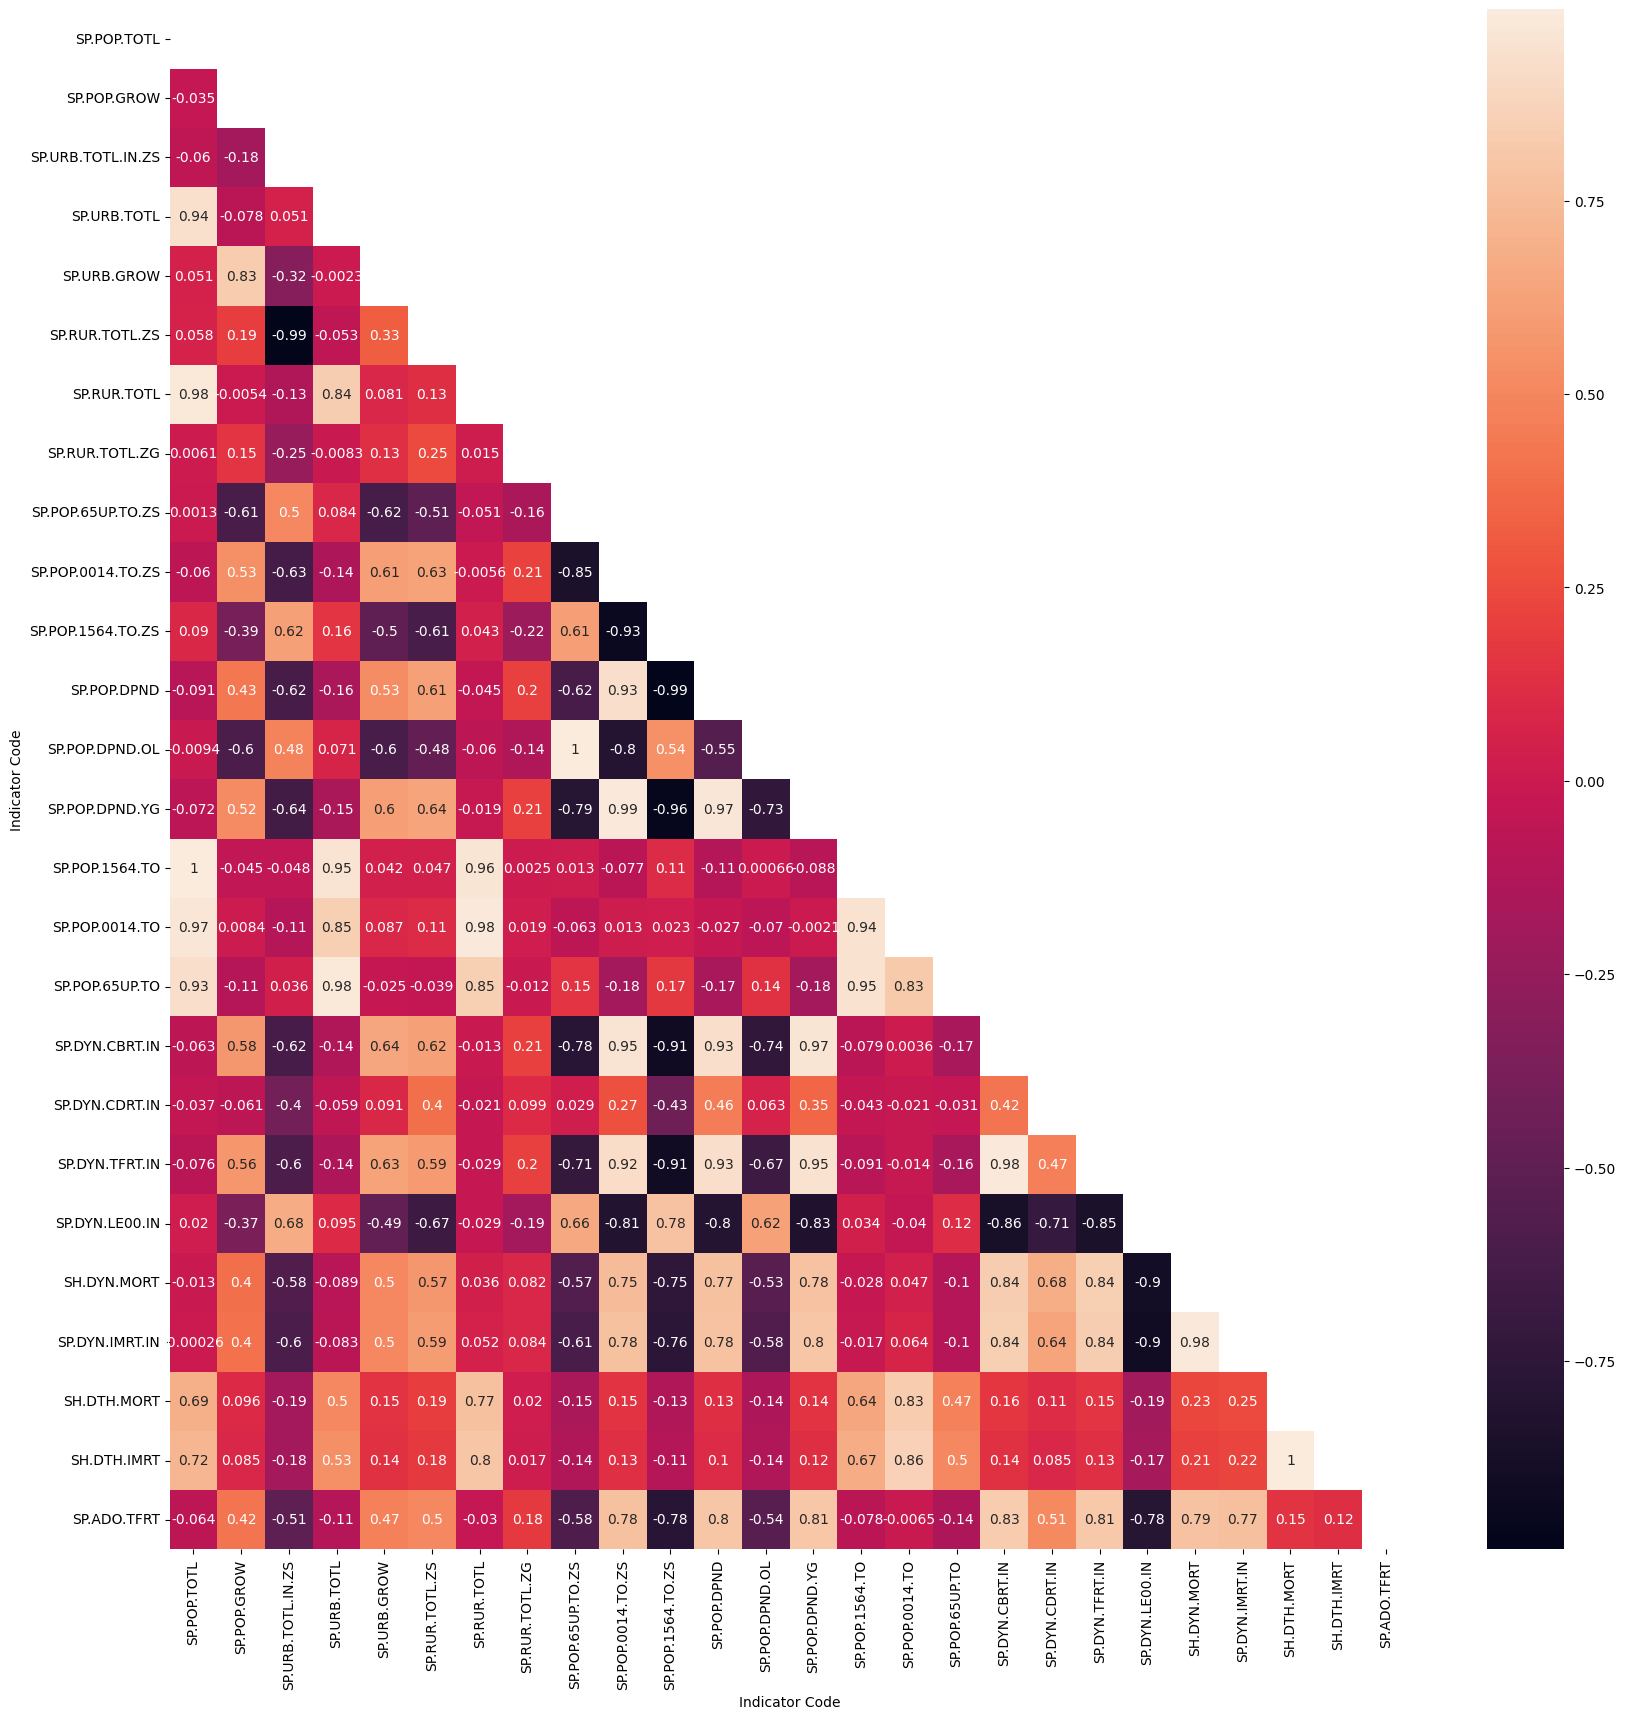

In [93]:
# Checking corelation
plt.figure(figsize=(20, 20))
corr_1 = df_x_4.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr_1)
sns.heatmap(corr_1, annot=True, mask=matrix)

In [94]:
corr_1

Indicator Code     SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  SP.URB.TOTL  \
Indicator Code                                                                
SP.POP.TOTL           1.000000    -0.035374          -0.060135     0.939379   
SP.POP.GROW          -0.035374     1.000000          -0.183398    -0.077796   
SP.URB.TOTL.IN.ZS    -0.060135    -0.183398           1.000000     0.050647   
SP.URB.TOTL           0.939379    -0.077796           0.050647     1.000000   
SP.URB.GROW           0.050604     0.832925          -0.324230    -0.002326   
SP.RUR.TOTL.ZS        0.058471     0.191218          -0.990622    -0.053410   
SP.RUR.TOTL           0.975577    -0.005416          -0.125189     0.841278   
SP.RUR.TOTL.ZG        0.006088     0.151219          -0.245289    -0.008255   
SP.POP.65UP.TO.ZS     0.001278    -0.607170           0.503203     0.083728   
SP.POP.0014.TO.ZS    -0.060249     0.533170          -0.632730    -0.141640   
SP.POP.1564.TO.ZS     0.090393    -0.393390           0.615135     0.157429   
SP.POP.DPND          -0.091108     0.432556          -0.619860    -0.157158   
SP.POP.DPND.OL       -0.009407    -0.598810           0.478152     0.070974   
SP.POP.DPND.YG       -0.071585     0.522402          -0.640829    -0.148218   
SP.POP.1564.TO        0.996889    -0.045242          -0.048335     0.951869   
SP.POP.0014.TO        0.966334     0.008379          -0.108873     0.845594   
SP.POP.65UP.TO        0.933607    -0.107899           0.035970     0.978157   
SP.DYN.CBRT.IN       -0.063368     0.576923          -0.619018    -0.137259   
SP.DYN.CDRT.IN       -0.036913    -0.061159          -0.402957    -0.059446   
SP.DYN.TFRT.IN       -0.076228     0.563055          -0.596024    -0.144196   
SP.DYN.LE00.IN        0.019666    -0.370274           0.676111     0.095359   
SH.DYN.MORT          -0.012791     0.398344          -0.577353    -0.089097   
SP.DYN.IMRT.IN       -0.000260     0.399985          -0.598424    -0.083029   
SH.DTH.MORT           0.693950     0.096241          -0.191785     0.503372   
SH.DTH.IMRT           0.723519     0.085345          -0.180708     0.532514   
SP.ADO.TFRT          -0.063985     0.419369          -0.508524    -0.112919   

Indicator Code     SP.URB.GROW  SP.RUR.TOTL.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  \
Indicator Code                                                                
SP.POP.TOTL           0.050604        0.058471     0.975577        0.006088   
SP.POP.GROW           0.832925        0.191218    -0.005416        0.151219   
SP.URB.TOTL.IN.ZS    -0.324230       -0.990622    -0.125189       -0.245289   
SP.URB.TOTL          -0.002326       -0.053410     0.841278       -0.008255   
SP.URB.GROW           1.000000        0.328346     0.081345        0.130510   
SP.RUR.TOTL.ZS        0.328346        1.000000     0.126266        0.247132   
SP.RUR.TOTL           0.081345        0.126266     1.000000        0.014866   
SP.RUR.TOTL.ZG        0.130510        0.247132     0.014866        1.000000   
SP.POP.65UP.TO.ZS    -0.620499       -0.506516    -0.051334       -0.157931   
SP.POP.0014.TO.ZS     0.607085        0.627976    -0.005559        0.214663   
SP.POP.1564.TO.ZS    -0.496260       -0.605673     0.043444       -0.217419   
SP.POP.DPND           0.529034        0.612267    -0.044558        0.204133   
SP.POP.DPND.OL       -0.604811       -0.483234    -0.060229       -0.137240   
SP.POP.DPND.YG        0.602735        0.636082    -0.019230        0.205301   
SP.POP.1564.TO        0.042022        0.046706     0.962707        0.002485   
SP.POP.0014.TO        0.087160        0.107465     0.982433        0.018940   
SP.POP.65UP.TO       -0.025393       -0.038628     0.846137       -0.012176   
SP.DYN.CBRT.IN        0.643495        0.615012    -0.013185        0.205049   
SP.DYN.CDRT.IN        0.091263        0.395667    -0.021340        0.098780   
SP.DYN.TFRT.IN        0.627348        0.591391    -0.029062        0.204770   
SP.DYN.LE00.IN       -0.493015       -0.671513   

As we still see a lot of features with high correlation, setting cut-off for corelation as 0.75. Meaning only features with correlation coefficient less than 0.75 will be considered.

In [95]:
corr_coeff_cutoff = .75

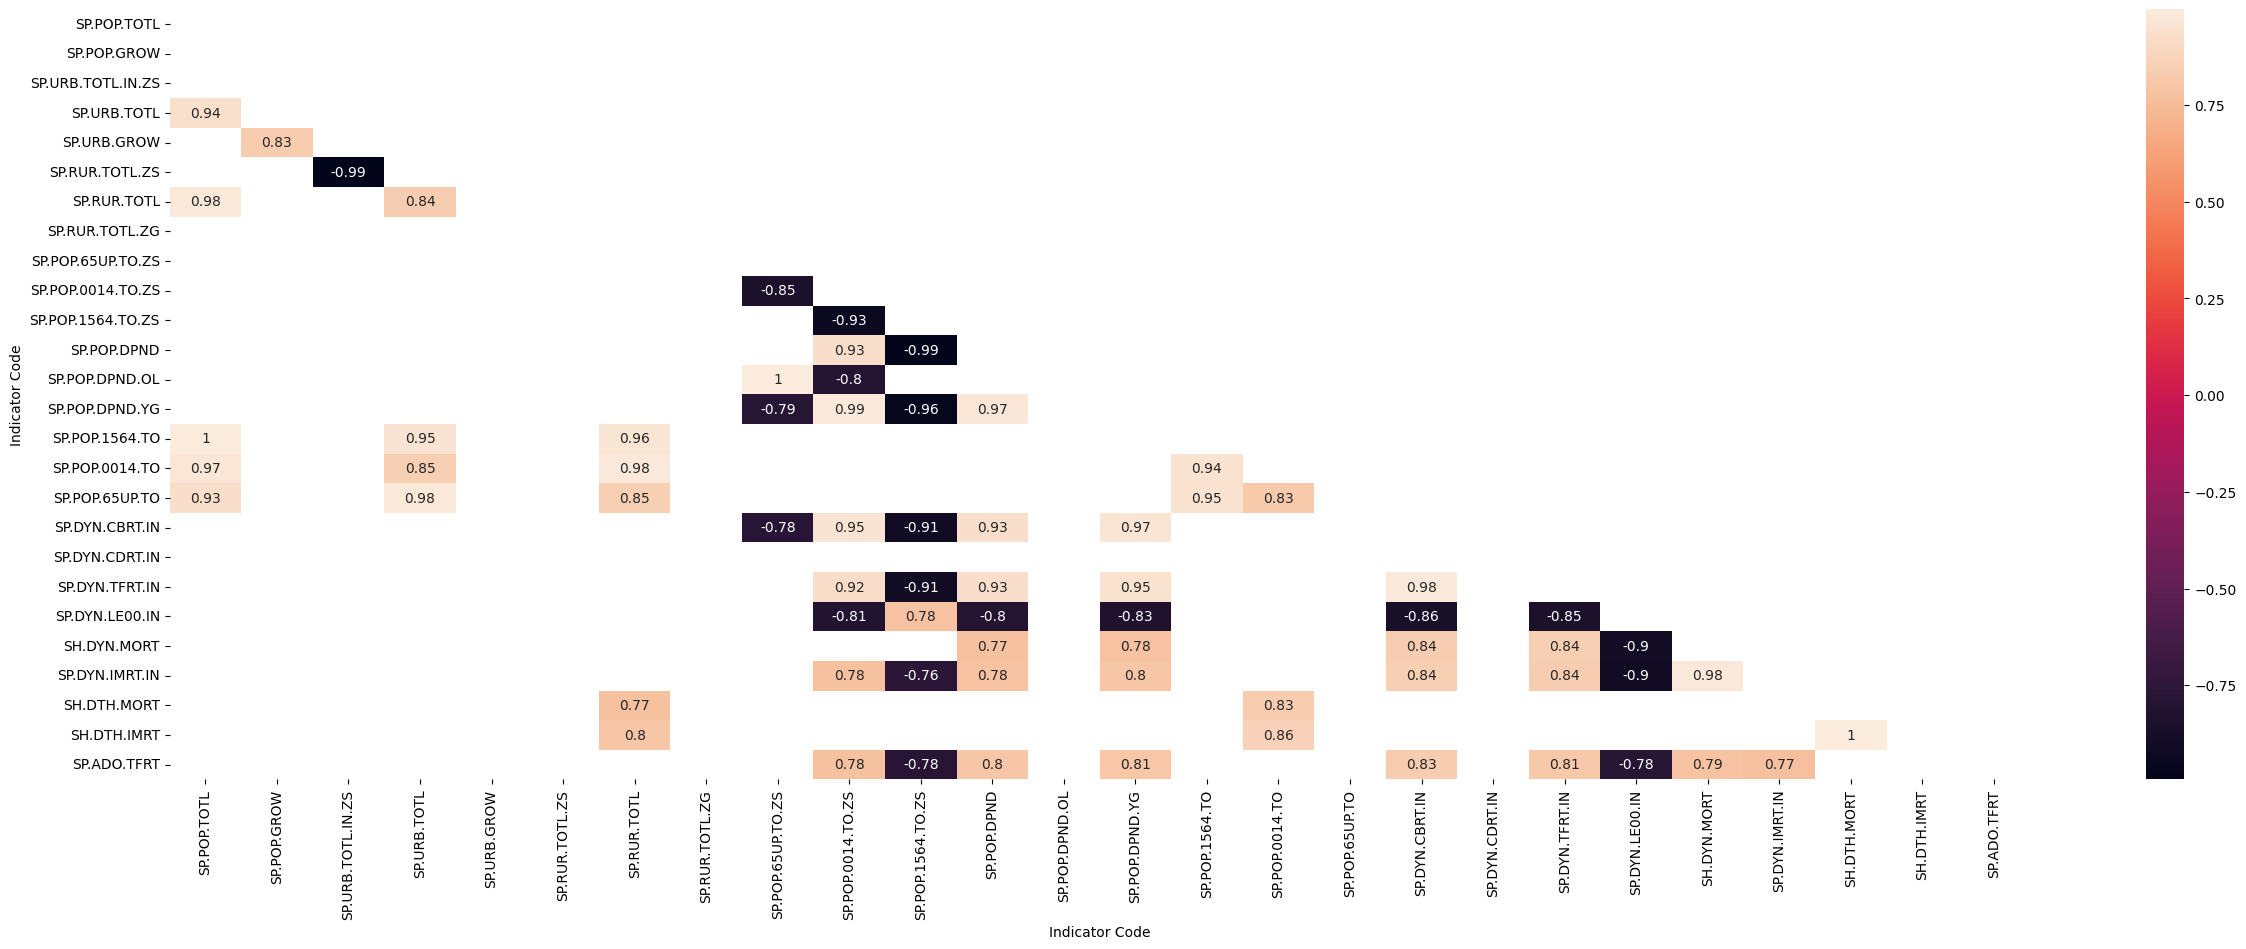

In [96]:
filtered_corr_1 = corr_1[((corr_1 >= corr_coeff_cutoff) | (corr_1 <= -corr_coeff_cutoff)) & (corr_1 !=1.000)]
plt.figure(figsize=(30,10))
# Getting the Upper Triangle of the co-relation matrix
matrix_1 = np.triu(corr_1)
sns.heatmap(filtered_corr_1, annot=True, mask=matrix_1)
#sns.heatmap(filtered_corr_1, annot=True, cmap="Reds")
plt.show()

In [97]:
filtered_corr_1

Indicator Code     SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  SP.URB.TOTL  \
Indicator Code                                                                
SP.POP.TOTL                NaN          NaN                NaN     0.939379   
SP.POP.GROW                NaN          NaN                NaN          NaN   
SP.URB.TOTL.IN.ZS          NaN          NaN                NaN          NaN   
SP.URB.TOTL           0.939379          NaN                NaN          NaN   
SP.URB.GROW                NaN     0.832925                NaN          NaN   
SP.RUR.TOTL.ZS             NaN          NaN          -0.990622          NaN   
SP.RUR.TOTL           0.975577          NaN                NaN     0.841278   
SP.RUR.TOTL.ZG             NaN          NaN                NaN          NaN   
SP.POP.65UP.TO.ZS          NaN          NaN                NaN          NaN   
SP.POP.0014.TO.ZS          NaN          NaN                NaN          NaN   
SP.POP.1564.TO.ZS          NaN          NaN                NaN          NaN   
SP.POP.DPND                NaN          NaN                NaN          NaN   
SP.POP.DPND.OL             NaN          NaN                NaN          NaN   
SP.POP.DPND.YG             NaN          NaN                NaN          NaN   
SP.POP.1564.TO        0.996889          NaN                NaN     0.951869   
SP.POP.0014.TO        0.966334          NaN                NaN     0.845594   
SP.POP.65UP.TO        0.933607          NaN                NaN     0.978157   
SP.DYN.CBRT.IN             NaN          NaN                NaN          NaN   
SP.DYN.CDRT.IN             NaN          NaN                NaN          NaN   
SP.DYN.TFRT.IN             NaN          NaN                NaN          NaN   
SP.DYN.LE00.IN             NaN          NaN                NaN          NaN   
SH.DYN.MORT                NaN          NaN                NaN          NaN   
SP.DYN.IMRT.IN             NaN          NaN                NaN          NaN   
SH.DTH.MORT                NaN          NaN                NaN          NaN   
SH.DTH.IMRT                NaN          NaN                NaN          NaN   
SP.ADO.TFRT                NaN          NaN                NaN          NaN   

Indicator Code     SP.URB.GROW  SP.RUR.TOTL.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  \
Indicator Code                                                                
SP.POP.TOTL                NaN             NaN     0.975577             NaN   
SP.POP.GROW           0.832925             NaN          NaN             NaN   
SP.URB.TOTL.IN.ZS          NaN       -0.990622          NaN             NaN   
SP.URB.TOTL                NaN             NaN     0.841278             NaN   
SP.URB.GROW                NaN             NaN          NaN             NaN   
SP.RUR.TOTL.ZS             NaN             NaN          NaN             NaN   
SP.RUR.TOTL                NaN             NaN          NaN             NaN   
SP.RUR.TOTL.ZG             NaN             NaN          NaN             NaN   
SP.POP.65UP.TO.ZS          NaN             NaN          NaN             NaN   
SP.POP.0014.TO.ZS          NaN             NaN          NaN             NaN   
SP.POP.1564.TO.ZS          NaN             NaN          NaN             NaN   
SP.POP.DPND                NaN             NaN          NaN             NaN   
SP.POP.DPND.OL             NaN             NaN          NaN             NaN   
SP.POP.DPND.YG             NaN             NaN          NaN             NaN   
SP.POP.1564.TO             NaN             NaN     0.962707             NaN   
SP.POP.0014.TO             NaN             NaN     0.982433             NaN   
SP.POP.65UP.TO             NaN             NaN     0.846137             NaN   
SP.DYN.CBRT.IN             NaN             NaN          NaN             NaN   
SP.DYN.CDRT.IN             NaN             NaN          NaN             NaN   
SP.DYN.TFRT.IN             NaN             NaN          NaN             NaN   
SP.DYN.LE00.IN             NaN             NaN   

In [98]:
df_economy = pd.read_csv("EconomyData.csv")
df_economy.head()

Economy Code                      Region         Income group  \
0     Afghanistan  AFG                  South Asia           Low income   
1         Albania  ALB       Europe & Central Asia  Upper middle income   
2         Algeria  DZA  Middle East & North Africa  Upper middle income   
3  American Samoa  ASM         East Asia & Pacific          High income   
4         Andorra  AND       Europe & Central Asia          High income   

  Lending category  
0              IDA  
1             IBRD  
2             IBRD  
3              NaN  
4              NaN

Adding economy data to enhance the dataset. This dataset from WorldBank helps us categorize the countries into socio-econmic buckets like High Income/ Upper middle income/ Lower middle income/ Low Income etc.

In [99]:
economy_dict = df_economy[['Economy', 'Income group']].set_index('Economy').to_dict()
economy_dict

{'Income group': {'Afghanistan': 'Low income',
  'Albania': 'Upper middle income',
  'Algeria': 'Upper middle income',
  'American Samoa': 'High income',
  'Andorra': 'High income',
  'Angola': 'Lower middle income',
  'Antigua and Barbuda': 'High income',
  'Argentina': 'Upper middle income',
  'Armenia': 'Upper middle income',
  'Aruba': 'High income',
  'Australia': 'High income',
  'Austria': 'High income',
  'Azerbaijan': 'Upper middle income',
  'Bahamas, The': 'High income',
  'Bahrain': 'High income',
  'Bangladesh': 'Lower middle income',
  'Barbados': 'High income',
  'Belarus': 'Upper middle income',
  'Belgium': 'High income',
  'Belize': 'Upper middle income',
  'Benin': 'Lower middle income',
  'Bermuda': 'High income',
  'Bhutan': 'Lower middle income',
  'Bolivia': 'Lower middle income',
  'Bosnia and Herzegovina': 'Upper middle income',
  'Botswana': 'Upper middle income',
  'Brazil': 'Upper middle income',
  'British Virgin Islands': 'High income',
  'Brunei Darussala

In [100]:
economy_dict = df_economy[['Economy', 'Income group']].set_index('Economy').to_dict()
# Convert keys in 'Income group' to lowercase to handle potential inconsistencies
economy_dict['Income group'] = {k.lower(): v for k, v in economy_dict['Income group'].items()}

# Now, during the dictionary comprehension:
country_code_economy_dict = {}  # Initialize an empty dictionary

for k in df_x_4.index.get_level_values('Country Code').drop_duplicates():
    country_name = country_dict[k]
    # Convert the country name to lowercase to check in the lowercase keys
    if country_name.lower() in economy_dict['Income group']:
        country_code_economy_dict[k] = economy_dict['Income group'][country_name.lower()]
    else:
        # Handle cases where the country name is not in economy_dict
        print(f"Warning: Country name '{country_name}' not found in economy_dict.")
        # You can choose a default value, skip, or raise an error here.
        # For example, assign 'Unknown' as the income group:
        country_code_economy_dict[k] = 'Unknown'

country_code_economy_dict  # Display the dictionary

{0: 'Low income',
 1: 'Upper middle income',
 2: 'Upper middle income',
 3: 'Lower middle income',
 4: 'High income',
 5: 'Upper middle income',
 6: 'Upper middle income',
 7: 'High income',
 8: 'High income',
 9: 'High income',
 10: 'Upper middle income',
 11: 'High income',
 12: 'High income',
 13: 'Lower middle income',
 14: 'High income',
 15: 'Upper middle income',
 16: 'High income',
 17: 'Upper middle income',
 18: 'Lower middle income',
 19: 'Lower middle income',
 20: 'Lower middle income',
 21: 'Upper middle income',
 22: 'Upper middle income',
 23: 'Upper middle income',
 24: 'High income',
 25: 'High income',
 26: 'Low income',
 27: 'Low income',
 28: 'Lower middle income',
 29: 'Lower middle income',
 30: 'Lower middle income',
 31: 'High income',
 32: 'Low income',
 33: 'Low income',
 34: 'High income',
 35: 'High income',
 36: 'Upper middle income',
 37: 'Upper middle income',
 38: 'Lower middle income',
 39: 'Low income',
 40: 'Lower middle income',
 41: 'Upper middle i

In [101]:
df_x_4['Economy'] = df_x_4.index.get_level_values('Country Code').map(country_code_economy_dict)

In [102]:
df_x_4.head()

Indicator Code     SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  SP.URB.TOTL  \
Country Code Year                                                             
0            1990   12067570.0     3.879694             18.316    2210296.0   
             1991   12789374.0     5.809298             18.597    2378440.0   
             1992   13745630.0     7.210629             18.882    2595450.0   
             1993   14824371.0     7.555156             19.170    2841832.0   
             1994   15869967.0     6.815594             19.462    3088613.0   

Indicator Code     SP.URB.GROW  SP.RUR.TOTL.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  \
Country Code Year                                                             
0            1990     5.409140          81.684    9857274.0        3.539933   
             1991     7.331837          81.403   10410934.0        5.464694   
             1992     8.731510          81.118   11150180.0        6.859904   
             1993     9.068900          80.830   11982539.0        7.199487   
             1994     8.327321          80.538   12781354.0        6.453688   

Indicator Code     SP.POP.65UP.TO.ZS  SP.POP.0014.TO.ZS  ...  SP.DYN.CBRT.IN  \
Country Code Year                                        ...                   
0            1990           2.207072          48.065170  ...          49.029   
             1991           2.221282          48.029450  ...          48.896   
             1992           2.238617          47.980565  ...          48.834   
             1993           2.258915          47.960504  ...          48.839   
             1994           2.284970          47.926086  ...          48.898   

Indicator Code     SP.DYN.CDRT.IN  SP.DYN.TFRT.IN  SP.DYN.LE00.IN  \
Country Code Year                                                   
0            1990          15.555           7.466       49.861049   
             1991          15.008           7.479       50.640976   
             1992          14.524           7.502       51.362927   
             1993          14.101           7.535       52.021878   
             1994          13.736           7.572       52.614341   

Indicator Code     SH.DYN.MORT  SP.DYN.IMRT.IN  SH.DTH.MORT  SH.DTH.IMRT  \
Country Code Year                                                          
0            1990        181.0           122.5     100437.0      68718.0   
             1991        174.2           118.3     101417.0      69482.0   
             1992        167.8           114.4     104899.0      72376.0   
             1993        162.0           110.9     109625.0      76190.0   
             1994        156.8           107.7     113758.0      79446.0   

Indicator Code     SP.ADO.TFRT     Economy  
Country Code Year                           
0            1990     162.7380  Low income  
             1991     163.3270  Low income  
             1992     163.9160  Low income  
             1993     164.1812  Low income  
             1994     164.4464  Low income  

[5 rows x 27 columns]

In [103]:
df_x_4.to_csv('health_data_processed_5.csv')

In [104]:
# Create dummy variables
df_economy_dummies = pd.get_dummies(df_x_4['Economy'], columns=['Economy'])
df_economy_dummies

High income  Low income  Lower middle income  Unknown  \
Country Code Year                                                          
0            1990        False        True                False    False   
             1991        False        True                False    False   
             1992        False        True                False    False   
             1993        False        True                False    False   
             1994        False        True                False    False   
...                        ...         ...                  ...      ...   
193          2011        False       False                 True    False   
             2012        False       False                 True    False   
             2013        False       False                 True    False   
             2014        False       False                 True    False   
             2015        False       False                 True    False   

                   Upper middle income  
Country Code Year                       
0            1990                False  
             1991                False  
             1992                False  
             1993                False  
             1994                False  
...                                ...  
193          2011                False  
             2012                False  
             2013                False  
             2014                False  
             2015                False  

[5044 rows x 5 columns]

In [105]:
df_x_5 = pd.concat([df_x_4, df_economy_dummies], axis=1)
df_x_5.head()

SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  SP.URB.TOTL  \
Country Code Year                                                             
0            1990   12067570.0     3.879694             18.316    2210296.0   
             1991   12789374.0     5.809298             18.597    2378440.0   
             1992   13745630.0     7.210629             18.882    2595450.0   
             1993   14824371.0     7.555156             19.170    2841832.0   
             1994   15869967.0     6.815594             19.462    3088613.0   

                   SP.URB.GROW  SP.RUR.TOTL.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  \
Country Code Year                                                             
0            1990     5.409140          81.684    9857274.0        3.539933   
             1991     7.331837          81.403   10410934.0        5.464694   
             1992     8.731510          81.118   11150180.0        6.859904   
             1993     9.068900          80.830   11982539.0        7.199487   
             1994     8.327321          80.538   12781354.0        6.453688   

                   SP.POP.65UP.TO.ZS  SP.POP.0014.TO.ZS  ...  SP.DYN.IMRT.IN  \
Country Code Year                                        ...                   
0            1990           2.207072          48.065170  ...           122.5   
             1991           2.221282          48.029450  ...           118.3   
             1992           2.238617          47.980565  ...           114.4   
             1993           2.258915          47.960504  ...           110.9   
             1994           2.284970          47.926086  ...           107.7   

                   SH.DTH.MORT  SH.DTH.IMRT  SP.ADO.TFRT     Economy  \
Country Code Year                                                      
0            1990     100437.0      68718.0     162.7380  Low income   
             1991     101417.0      69482.0     163.3270  Low income   
             1992     104899.0      72376.0     163.9160  Low income   
             1993     109625.0      76190.0     164.1812  Low income   
             1994     113758.0      79446.0     164.4464  Low income   

                   High income  Low income  Lower middle income  Unknown  \
Country Code Year                                                          
0            1990        False        True                False    False   
             1991        False        True                False    False   
             1992        False        True                False    False   
             1993        False        True                False    False   
             1994        False        True                False    False   

                   Upper middle income  
Country Code Year                       
0            1990                False  
             1991                False  
             1992                False  
             1993                False  
             1994                False  

[5 rows x 32 columns]

In [106]:
df_x_5.rename(columns = {'High income' : "Economy High income"}, inplace=True)
df_x_5.rename(columns = {'Low income' : "Economy Low income"}, inplace=True)
df_x_5.rename(columns = {'Lower middle income' : "Economy Lower middle income"}, inplace=True)
df_x_5.rename(columns = {'Unknown' : "Economy Unknown"}, inplace=True)
df_x_5.rename(columns = {'Upper middle income' : "Economy Upper middle income"}, inplace=True)

In [107]:
df_x_5.columns

Index(['SP.POP.TOTL', 'SP.POP.GROW', 'SP.URB.TOTL.IN.ZS', 'SP.URB.TOTL',
       'SP.URB.GROW', 'SP.RUR.TOTL.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG',
       'SP.POP.65UP.TO.ZS', 'SP.POP.0014.TO.ZS', 'SP.POP.1564.TO.ZS',
       'SP.POP.DPND', 'SP.POP.DPND.OL', 'SP.POP.DPND.YG', 'SP.POP.1564.TO',
       'SP.POP.0014.TO', 'SP.POP.65UP.TO', 'SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN',
       'SP.DYN.TFRT.IN', 'SP.DYN.LE00.IN', 'SH.DYN.MORT', 'SP.DYN.IMRT.IN',
       'SH.DTH.MORT', 'SH.DTH.IMRT', 'SP.ADO.TFRT', 'Economy',
       'Economy High income', 'Economy Low income',
       'Economy Lower middle income', 'Economy Unknown',
       'Economy Upper middle income'],
      dtype='object')

In [108]:
for col in ['Economy High income',
            'Economy Low income',
            'Economy Lower middle income',
            'Economy Unknown',
            'Economy Upper middle income'
          ]:
    df_x_5[col] = df_x_5[col].astype('int')

In [109]:
if 'Economy' in df_x_4.columns:
    df_x_4.drop('Economy', axis=1, inplace=True)

In [110]:
if 'Economy' in df_x_5.columns:
    df_x_5.drop('Economy', axis=1, inplace=True)

In [111]:
# Prepare the features and target
X_1 = df_x_4.drop(columns=target_variable)
y_1 = df_x_4[target_variable]

## Elastic Net Regression for Feature Selection

In [112]:
# Split into training and testing sets
X_1_train = X_1[X_1.index.get_level_values('Year') <= test_cutoff]
y_1_train = y_1[y_1.index.get_level_values('Year') <= test_cutoff]

X_1_test = X_1[X_1.index.get_level_values('Year') > test_cutoff]
y_1_test = y_1[y_1.index.get_level_values('Year') > test_cutoff]

In [113]:
# Scale the features
scaler = StandardScaler()
X_1_train_scaled = scaler.fit_transform(X_1_train)
X_1_test_scaled = scaler.transform(X_1_test)

# Fit ElasticNet model
model_en = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Tune alpha and l1_ratio as needed
model_en.fit(X_1_train_scaled, y_1_train)

# Make predictions
y_pred_en = model_en.predict(X_1_test_scaled)

# Evaluate the model
mse_en = mean_squared_error(y_1_test, y_pred_en)
print(f'Mean Squared Error: {mse_en}')
r2_en = model_en.score(X_1_test_scaled, y_1_test)
print(f'R-squared: {r2_en}')

# Print the coefficients
print(f'ElasticNet Coefficients: {model_en.coef_}')

Mean Squared Error: 10.632329449421002
R-squared: 0.8713413909939178
ElasticNet Coefficients: [-0.         -0.          0.52913994  0.         -0.         -0.52517181
 -0.         -0.          0.57166559 -0.50746648  0.27523069 -0.26221099
  0.60064645 -0.44705751 -0.         -0.          0.         -0.61215202
 -2.29193631 -0.48605303 -1.31504074 -1.3911441  -0.         -0.
 -0.48934362]


In [114]:
col_coef_list = [(col, coef) for col, coef in zip(X_1_train.columns, model_en.coef_) if abs(coef) != 0]
independent_variables = [e[0] for e in col_coef_list]
[(k, kpi_dict[k]) for k in independent_variables]

[('SP.URB.TOTL.IN.ZS', 'Urban population (% of total)'),
 ('SP.RUR.TOTL.ZS', 'Rural population (% of total population)'),
 ('SP.POP.65UP.TO.ZS', 'Population ages 65 and above (% of total)'),
 ('SP.POP.0014.TO.ZS', 'Population ages 00-14 (% of total)'),
 ('SP.POP.1564.TO.ZS', 'Population ages 15-64 (% of total)'),
 ('SP.POP.DPND', 'Age dependency ratio (% of working-age population)'),
 ('SP.POP.DPND.OL', 'Age dependency ratio, old'),
 ('SP.POP.DPND.YG', 'Age dependency ratio, young'),
 ('SP.DYN.CBRT.IN', 'Birth rate, crude (per 1,000 people)'),
 ('SP.DYN.CDRT.IN', 'Death rate, crude (per 1,000 people)'),
 ('SP.DYN.TFRT.IN', 'Fertility rate, total (births per woman)'),
 ('SH.DYN.MORT', 'Mortality rate, under-5 (per 1,000)'),
 ('SP.DYN.IMRT.IN', 'Mortality rate, infant (per 1,000 live births)'),
 ('SP.ADO.TFRT',
  'Adolescent fertility rate (births per 1,000 women ages 15-19)')]

Pearson Corelation with reduced feature set.

<Axes: xlabel='Indicator Code', ylabel='Indicator Code'>

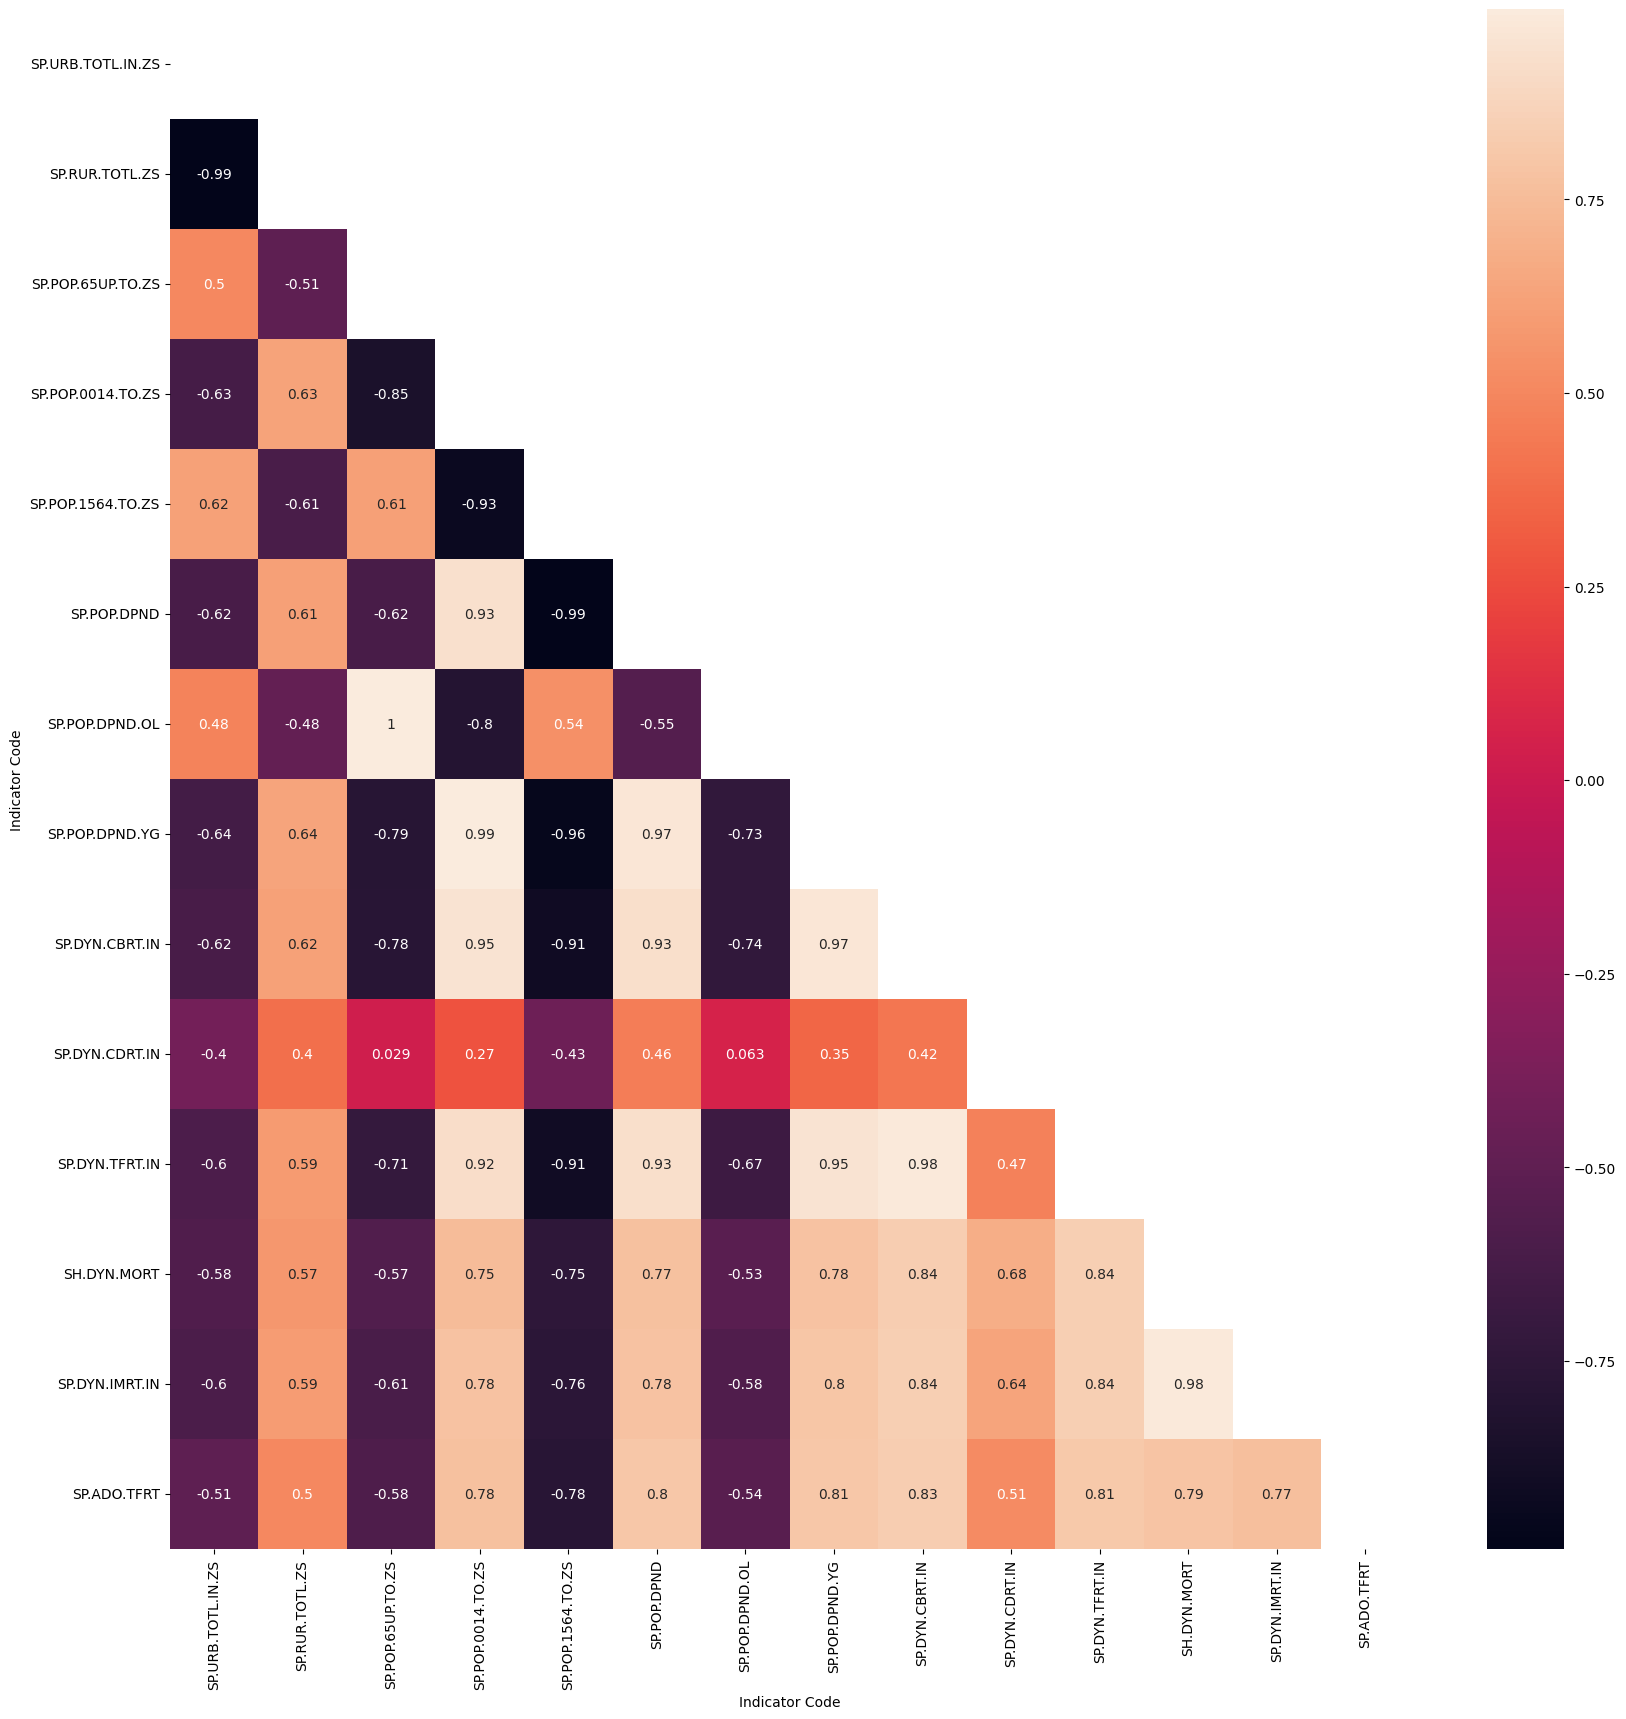

In [115]:
# Checking corelation
plt.figure(figsize=(20, 20))
corr_2 = df_x_4[independent_variables].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr_2)
sns.heatmap(corr_2, annot=True, mask=matrix)

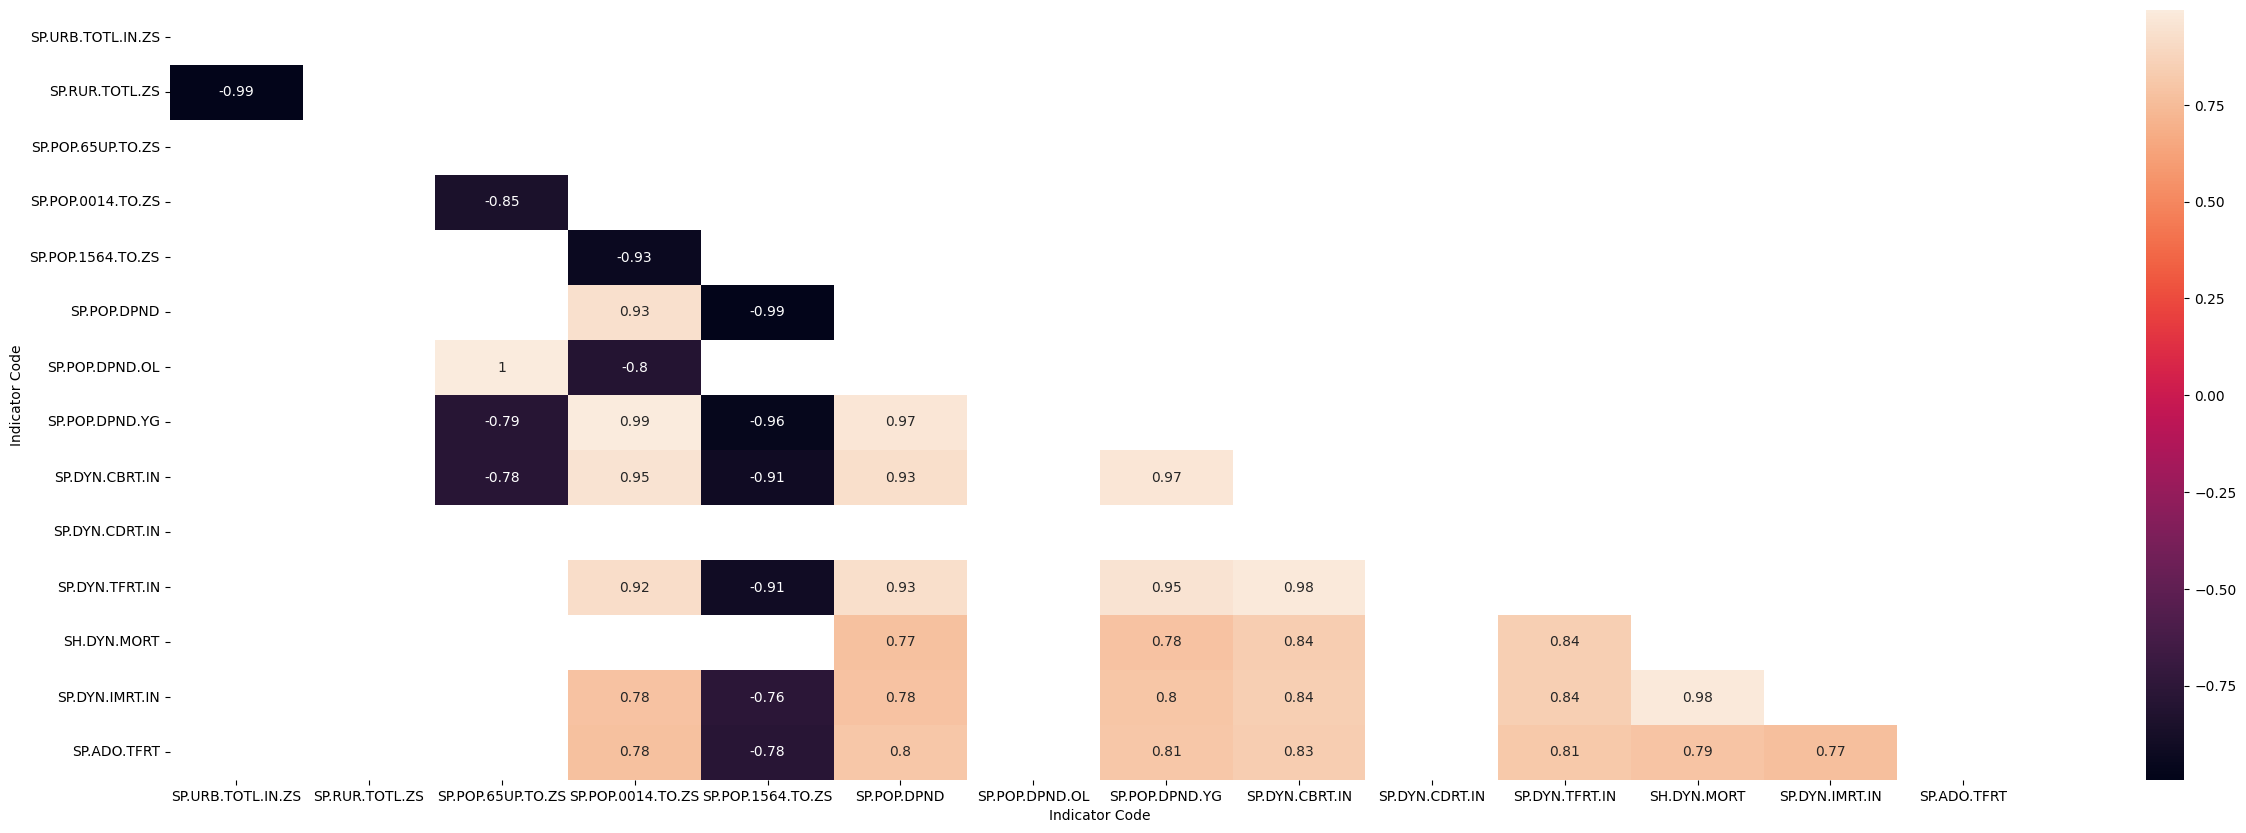

In [116]:
filtered_corr_2 = corr_2[((corr_2 >= corr_coeff_cutoff) | (corr_2 <= -corr_coeff_cutoff)) & (corr_2 !=1.000)]
plt.figure(figsize=(30,10))
# Getting the Upper Triangle of the co-relation matrix
matrix_2 = np.triu(corr_2)
sns.heatmap(filtered_corr_2, annot=True, mask=matrix_2)
#sns.heatmap(filtered_corr_1, annot=True, cmap="Reds")
plt.show()

In [117]:
filtered_corr_2

Indicator Code     SP.URB.TOTL.IN.ZS  SP.RUR.TOTL.ZS  SP.POP.65UP.TO.ZS  \
Indicator Code                                                            
SP.URB.TOTL.IN.ZS                NaN       -0.990622                NaN   
SP.RUR.TOTL.ZS             -0.990622             NaN                NaN   
SP.POP.65UP.TO.ZS                NaN             NaN                NaN   
SP.POP.0014.TO.ZS                NaN             NaN          -0.851520   
SP.POP.1564.TO.ZS                NaN             NaN                NaN   
SP.POP.DPND                      NaN             NaN                NaN   
SP.POP.DPND.OL                   NaN             NaN           0.995341   
SP.POP.DPND.YG                   NaN             NaN          -0.785560   
SP.DYN.CBRT.IN                   NaN             NaN          -0.780752   
SP.DYN.CDRT.IN                   NaN             NaN                NaN   
SP.DYN.TFRT.IN                   NaN             NaN                NaN   
SH.DYN.MORT                      NaN             NaN                NaN   
SP.DYN.IMRT.IN                   NaN             NaN                NaN   
SP.ADO.TFRT                      NaN             NaN                NaN   

Indicator Code     SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  SP.POP.DPND  \
Indicator Code                                                         
SP.URB.TOTL.IN.ZS                NaN                NaN          NaN   
SP.RUR.TOTL.ZS                   NaN                NaN          NaN   
SP.POP.65UP.TO.ZS          -0.851520                NaN          NaN   
SP.POP.0014.TO.ZS                NaN          -0.933827     0.933765   
SP.POP.1564.TO.ZS          -0.933827                NaN    -0.993207   
SP.POP.DPND                 0.933765          -0.993207          NaN   
SP.POP.DPND.OL             -0.804538                NaN          NaN   
SP.POP.DPND.YG              0.989250          -0.962545     0.971627   
SP.DYN.CBRT.IN              0.952822          -0.910645     0.928127   
SP.DYN.CDRT.IN                   NaN                NaN          NaN   
SP.DYN.TFRT.IN              0.920637          -0.906970     0.932312   
SH.DYN.MORT                      NaN                NaN     0.773561   
SP.DYN.IMRT.IN              0.778525          -0.762000     0.782031   
SP.ADO.TFRT                 0.777809          -0.781419     0.801149   

Indicator Code     SP.POP.DPND.OL  SP.POP.DPND.YG  SP.DYN.CBRT.IN  \
Indicator Code                                                      
SP.URB.TOTL.IN.ZS             NaN             NaN             NaN   
SP.RUR.TOTL.ZS                NaN             NaN             NaN   
SP.POP.65UP.TO.ZS        0.995341       -0.785560       -0.780752   
SP.POP.0014.TO.ZS       -0.804538        0.989250        0.952822   
SP.POP.1564.TO.ZS             NaN       -0.962545       -0.910645   
SP.POP.DPND                   NaN        0.971627        0.928127   
SP.POP.DPND.OL                NaN             NaN             NaN   
SP.POP.DPND.YG                NaN             NaN        0.965387   
SP.DYN.CBRT.IN                NaN        0.965387             NaN   
SP.DYN.CDRT.IN                NaN             NaN             NaN   
SP.DYN.TFRT.IN                NaN        0.949230        0.982857   
SH.DYN.MORT                   NaN        0.781876        0.838650   
SP.DYN.IMRT.IN                NaN        0.800866        0.843203   
SP.ADO.TFRT                   NaN        0.805397        0.832448   

Indicator Code     SP.DYN.CDRT.IN  SP.DYN.TFRT.IN  SH.DYN.MORT  \
Indicator Code                                                   
SP.URB.TOTL.IN.ZS             NaN             NaN          NaN   
SP.RUR.TOTL.ZS                NaN             NaN          NaN   
SP.POP.65UP.TO.ZS             NaN             NaN          NaN   
SP.POP.0014.TO.ZS             NaN        0.920637          NaN   
SP.POP.1564.TO.ZS             NaN       -0.906970          NaN   
SP.POP.DPND                   NaN        0.932312     0.773561   
SP.POP.DPND.O

In [118]:
for k in filtered_corr_2.columns:
    print(k, kpi_dict[k])

SP.URB.TOTL.IN.ZS Urban population (% of total)
SP.RUR.TOTL.ZS Rural population (% of total population)
SP.POP.65UP.TO.ZS Population ages 65 and above (% of total)
SP.POP.0014.TO.ZS Population ages 00-14 (% of total)
SP.POP.1564.TO.ZS Population ages 15-64 (% of total)
SP.POP.DPND Age dependency ratio (% of working-age population)
SP.POP.DPND.OL Age dependency ratio, old
SP.POP.DPND.YG Age dependency ratio, young
SP.DYN.CBRT.IN Birth rate, crude (per 1,000 people)
SP.DYN.CDRT.IN Death rate, crude (per 1,000 people)
SP.DYN.TFRT.IN Fertility rate, total (births per woman)
SH.DYN.MORT Mortality rate, under-5 (per 1,000)
SP.DYN.IMRT.IN Mortality rate, infant (per 1,000 live births)
SP.ADO.TFRT Adolescent fertility rate (births per 1,000 women ages 15-19)


In [119]:
#independent_variables = [col for col in df_x_4.columns if col != target_variable]

## Multicolinearity and VIF

Checking multicolinearity using variance inflation factor (VIF).

Multicollinearity occurs when the independent variables in a regression model are highly correlated. This leads to instability and unreliable estimates of the regression coefficients, which can severely impact the model's interpretability and predictive power.

VIF = 1: No multicollinearity. The variance of the coefficient estimate is not inflated.

VIF > 1 and < 5: Moderate multicollinearity.

VIF >= 5: High multicollinearity. Action should be taken, such as removing correlated variables.

In [120]:
df_vif = get_vif(df_x_4[independent_variables])
df_vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



Features          VIF
5         SP.POP.DPND          inf
6      SP.POP.DPND.OL          inf
7      SP.POP.DPND.YG          inf
3   SP.POP.0014.TO.ZS  2116.935442
2   SP.POP.65UP.TO.ZS  2112.015407
4   SP.POP.1564.TO.ZS   681.350751
8      SP.DYN.CBRT.IN   376.057734
0   SP.URB.TOTL.IN.ZS   340.169472
1      SP.RUR.TOTL.ZS   268.908747
10     SP.DYN.TFRT.IN   241.030349
12     SP.DYN.IMRT.IN   102.477576
11        SH.DYN.MORT   101.695525
9      SP.DYN.CDRT.IN    26.262625
13        SP.ADO.TFRT    11.379792

The VIF calculation shows all the independednt variables have high VIF. However, dropping variables with high VIF in such case would result in dropping all features. So, we ignored this result.

In [121]:
non_corr_features = df_vif[(df_vif['VIF'] >= 1) & (df_vif['VIF'] < 5)]['Features'].values.tolist()
non_corr_features

[]

<Axes: xlabel='Indicator Code', ylabel='Indicator Code'>

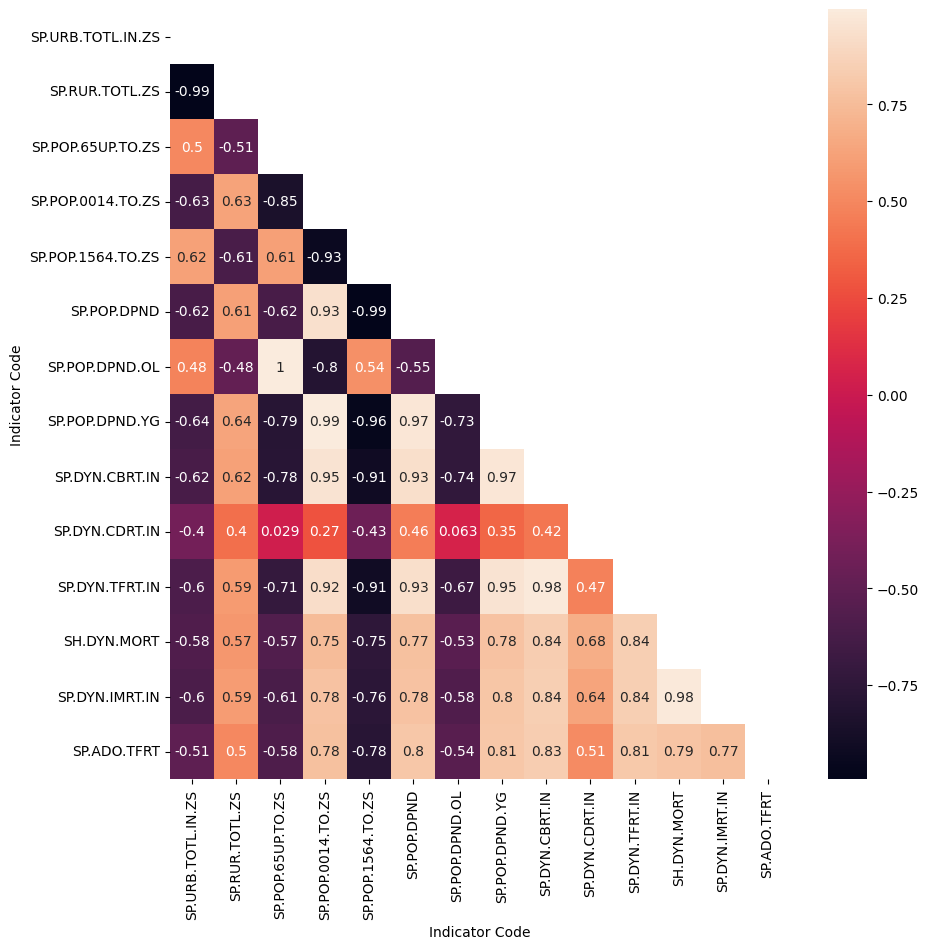

In [122]:
plt.figure(figsize=(10, 10))
corr_3 = df_x_4[independent_variables].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix_3 = np.triu(corr_3)
sns.heatmap(corr_3, annot=True, mask=matrix_3)

In [123]:
df_x_6 = df_x_5[['Economy High income',
       'Economy Low income', 'Economy Lower middle income', 'Economy Unknown',
       'Economy Upper middle income'] + independent_variables] #df_x_4[non_corr_features]
df_x_6.head()

Economy High income  Economy Low income  \
Country Code Year                                            
0            1990                    0                   1   
             1991                    0                   1   
             1992                    0                   1   
             1993                    0                   1   
             1994                    0                   1   

                   Economy Lower middle income  Economy Unknown  \
Country Code Year                                                 
0            1990                            0                0   
             1991                            0                0   
             1992                            0                0   
             1993                            0                0   
             1994                            0                0   

                   Economy Upper middle income  SP.URB.TOTL.IN.ZS  \
Country Code Year                                                   
0            1990                            0             18.316   
             1991                            0             18.597   
             1992                            0             18.882   
             1993                            0             19.170   
             1994                            0             19.462   

                   SP.RUR.TOTL.ZS  SP.POP.65UP.TO.ZS  SP.POP.0014.TO.ZS  \
Country Code Year                                                         
0            1990          81.684           2.207072          48.065170   
             1991          81.403           2.221282          48.029450   
             1992          81.118           2.238617          47.980565   
             1993          80.830           2.258915          47.960504   
             1994          80.538           2.284970          47.926086   

                   SP.POP.1564.TO.ZS  SP.POP.DPND  SP.POP.DPND.OL  \
Country Code Year                                                   
0            1990          49.727758   101.094930        4.438311   
             1991          49.749268   101.007981        4.464953   
             1992          49.780818   100.880590        4.496947   
             1993          49.780581   100.881545        4.537744   
             1994          49.788944   100.847802        4.589312   

                   SP.POP.DPND.YG  SP.DYN.CBRT.IN  SP.DYN.CDRT.IN  \
Country Code Year                                                   
0            1990       96.656619          49.029          15.555   
             1991       96.543028          48.896          15.008   
             1992       96.383643          48.834          14.524   
             1993       96.343801          48.839          14.101   
             1994       96.258490          48.898          13.736   

                   SP.DYN.TFRT.IN  SH.DYN.MORT  SP.DYN.IMRT.IN  SP.ADO.TFRT  
Country Code Year                                                            
0            1990           7.466        181.0           122.5     162.7380  
             1991           7.479        174.2           118.3     163.3270  
             1992           7.502        167.8           114.4     163.9160  
             1993           7.535        162.0           110.9     164.1812  
             1994           7.572        156.8           107.7     164.4464

In [124]:
corr_3

Indicator Code     SP.URB.TOTL.IN.ZS  SP.RUR.TOTL.ZS  SP.POP.65UP.TO.ZS  \
Indicator Code                                                            
SP.URB.TOTL.IN.ZS           1.000000       -0.990622           0.503203   
SP.RUR.TOTL.ZS             -0.990622        1.000000          -0.506516   
SP.POP.65UP.TO.ZS           0.503203       -0.506516           1.000000   
SP.POP.0014.TO.ZS          -0.632730        0.627976          -0.851520   
SP.POP.1564.TO.ZS           0.615135       -0.605673           0.607609   
SP.POP.DPND                -0.619860        0.612267          -0.617427   
SP.POP.DPND.OL              0.478152       -0.483234           0.995341   
SP.POP.DPND.YG             -0.640829        0.636082          -0.785560   
SP.DYN.CBRT.IN             -0.619018        0.615012          -0.780752   
SP.DYN.CDRT.IN             -0.402957        0.395667           0.029398   
SP.DYN.TFRT.IN             -0.596024        0.591391          -0.714678   
SH.DYN.MORT                -0.577353        0.574018          -0.569015   
SP.DYN.IMRT.IN             -0.598424        0.594005          -0.611641   
SP.ADO.TFRT                -0.508524        0.502118          -0.581588   

Indicator Code     SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  SP.POP.DPND  \
Indicator Code                                                         
SP.URB.TOTL.IN.ZS          -0.632730           0.615135    -0.619860   
SP.RUR.TOTL.ZS              0.627976          -0.605673     0.612267   
SP.POP.65UP.TO.ZS          -0.851520           0.607609    -0.617427   
SP.POP.0014.TO.ZS           1.000000          -0.933827     0.933765   
SP.POP.1564.TO.ZS          -0.933827           1.000000    -0.993207   
SP.POP.DPND                 0.933765          -0.993207     1.000000   
SP.POP.DPND.OL             -0.804538           0.539619    -0.552118   
SP.POP.DPND.YG              0.989250          -0.962545     0.971627   
SP.DYN.CBRT.IN              0.952822          -0.910645     0.928127   
SP.DYN.CDRT.IN              0.273918          -0.434985     0.456563   
SP.DYN.TFRT.IN              0.920637          -0.906970     0.932312   
SH.DYN.MORT                 0.749655          -0.747351     0.773561   
SP.DYN.IMRT.IN              0.778525          -0.762000     0.782031   
SP.ADO.TFRT                 0.777809          -0.781419     0.801149   

Indicator Code     SP.POP.DPND.OL  SP.POP.DPND.YG  SP.DYN.CBRT.IN  \
Indicator Code                                                      
SP.URB.TOTL.IN.ZS        0.478152       -0.640829       -0.619018   
SP.RUR.TOTL.ZS          -0.483234        0.636082        0.615012   
SP.POP.65UP.TO.ZS        0.995341       -0.785560       -0.780752   
SP.POP.0014.TO.ZS       -0.804538        0.989250        0.952822   
SP.POP.1564.TO.ZS        0.539619       -0.962545       -0.910645   
SP.POP.DPND             -0.552118        0.971627        0.928127   
SP.POP.DPND.OL           1.000000       -0.733654       -0.736615   
SP.POP.DPND.YG          -0.733654        1.000000        0.965387   
SP.DYN.CBRT.IN          -0.736615        0.965387        1.000000   
SP.DYN.CDRT.IN           0.062615        0.354339        0.421811   
SP.DYN.TFRT.IN          -0.667636        0.949230        0.982857   
SH.DYN.MORT             -0.533780        0.781876        0.838650   
SP.DYN.IMRT.IN          -0.576387        0.800866        0.843203   
SP.ADO.TFRT             -0.537434        0.805397        0.832448   

Indicator Code     SP.DYN.CDRT.IN  SP.DYN.TFRT.IN  SH.DYN.MORT  \
Indicator Code                                                   
SP.URB.TOTL.IN.ZS       -0.402957       -0.596024    -0.577353   
SP.RUR.TOTL.ZS           0.395667        0.591391     0.574018   
SP.POP.65UP.TO.ZS        0.029398       -0.714678    -0.569015   
SP.POP.0014.TO.ZS        0.273918        0.920637     0.749655   
SP.POP.1564.TO.ZS       -0.434985       -0.906970    -0.747351   
SP.POP.DPND              0.456563        0.932312     0.773561   
SP.POP.DPND.O

In [125]:
# df_x_5 has index and df_x_6 does not have index.
#df_x_5[target_variable] = df_x_4[target_variable].values.tolist()
#df_x_5.drop(columns=['Economy'], inplace=True)
df_x_6 = df_x_5.reset_index()
df_x_6.head()

Country Code  Year  SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  \
0             0  1990   12067570.0     3.879694             18.316   
1             0  1991   12789374.0     5.809298             18.597   
2             0  1992   13745630.0     7.210629             18.882   
3             0  1993   14824371.0     7.555156             19.170   
4             0  1994   15869967.0     6.815594             19.462   

   SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  ...  \
0    2210296.0     5.409140          81.684    9857274.0        3.539933  ...   
1    2378440.0     7.331837          81.403   10410934.0        5.464694  ...   
2    2595450.0     8.731510          81.118   11150180.0        6.859904  ...   
3    2841832.0     9.068900          80.830   11982539.0        7.199487  ...   
4    3088613.0     8.327321          80.538   12781354.0        6.453688  ...   

   SH.DYN.MORT  SP.DYN.IMRT.IN  SH.DTH.MORT  SH.DTH.IMRT  SP.ADO.TFRT  \
0        181.0           122.5     100437.0      68718.0     162.7380   
1        174.2           118.3     101417.0      69482.0     163.3270   
2        167.8           114.4     104899.0      72376.0     163.9160   
3        162.0           110.9     109625.0      76190.0     164.1812   
4        156.8           107.7     113758.0      79446.0     164.4464   

   Economy High income  Economy Low income  Economy Lower middle income  \
0                    0                   1                            0   
1                    0                   1                            0   
2                    0                   1                            0   
3                    0                   1                            0   
4                    0                   1                            0   

   Economy Unknown  Economy Upper middle income  
0                0                            0  
1                0                            0  
2                0                            0  
3                0                            0  
4                0                            0  

[5 rows x 33 columns]

In [126]:
df_x_6.isna().any()

Country Code                   False
Year                           False
SP.POP.TOTL                    False
SP.POP.GROW                    False
SP.URB.TOTL.IN.ZS              False
SP.URB.TOTL                    False
SP.URB.GROW                    False
SP.RUR.TOTL.ZS                 False
SP.RUR.TOTL                    False
SP.RUR.TOTL.ZG                 False
SP.POP.65UP.TO.ZS              False
SP.POP.0014.TO.ZS              False
SP.POP.1564.TO.ZS              False
SP.POP.DPND                    False
SP.POP.DPND.OL                 False
SP.POP.DPND.YG                 False
SP.POP.1564.TO                 False
SP.POP.0014.TO                 False
SP.POP.65UP.TO                 False
SP.DYN.CBRT.IN                 False
SP.DYN.CDRT.IN                 False
SP.DYN.TFRT.IN                 False
SP.DYN.LE00.IN                 False
SH.DYN.MORT                    False
SP.DYN.IMRT.IN                 False
SH.DTH.MORT                    False
SH.DTH.IMRT                    False
SP.ADO.TFRT                    False
Economy High income            False
Economy Low income             False
Economy Lower middle income    False
Economy Unknown                False
Economy Upper middle income    False
dtype: bool

In [127]:
df_x_6.to_csv('health_data_processed_6.csv', index=False)

In [128]:
df_x_6.head()

Country Code  Year  SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  \
0             0  1990   12067570.0     3.879694             18.316   
1             0  1991   12789374.0     5.809298             18.597   
2             0  1992   13745630.0     7.210629             18.882   
3             0  1993   14824371.0     7.555156             19.170   
4             0  1994   15869967.0     6.815594             19.462   

   SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  ...  \
0    2210296.0     5.409140          81.684    9857274.0        3.539933  ...   
1    2378440.0     7.331837          81.403   10410934.0        5.464694  ...   
2    2595450.0     8.731510          81.118   11150180.0        6.859904  ...   
3    2841832.0     9.068900          80.830   11982539.0        7.199487  ...   
4    3088613.0     8.327321          80.538   12781354.0        6.453688  ...   

   SH.DYN.MORT  SP.DYN.IMRT.IN  SH.DTH.MORT  SH.DTH.IMRT  SP.ADO.TFRT  \
0        181.0           122.5     100437.0      68718.0     162.7380   
1        174.2           118.3     101417.0      69482.0     163.3270   
2        167.8           114.4     104899.0      72376.0     163.9160   
3        162.0           110.9     109625.0      76190.0     164.1812   
4        156.8           107.7     113758.0      79446.0     164.4464   

   Economy High income  Economy Low income  Economy Lower middle income  \
0                    0                   1                            0   
1                    0                   1                            0   
2                    0                   1                            0   
3                    0                   1                            0   
4                    0                   1                            0   

   Economy Unknown  Economy Upper middle income  
0                0                            0  
1                0                            0  
2                0                            0  
3                0                            0  
4                0                            0  

[5 rows x 33 columns]

In [129]:
df_x_5.head()

SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  SP.URB.TOTL  \
Country Code Year                                                             
0            1990   12067570.0     3.879694             18.316    2210296.0   
             1991   12789374.0     5.809298             18.597    2378440.0   
             1992   13745630.0     7.210629             18.882    2595450.0   
             1993   14824371.0     7.555156             19.170    2841832.0   
             1994   15869967.0     6.815594             19.462    3088613.0   

                   SP.URB.GROW  SP.RUR.TOTL.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  \
Country Code Year                                                             
0            1990     5.409140          81.684    9857274.0        3.539933   
             1991     7.331837          81.403   10410934.0        5.464694   
             1992     8.731510          81.118   11150180.0        6.859904   
             1993     9.068900          80.830   11982539.0        7.199487   
             1994     8.327321          80.538   12781354.0        6.453688   

                   SP.POP.65UP.TO.ZS  SP.POP.0014.TO.ZS  ...  SH.DYN.MORT  \
Country Code Year                                        ...                
0            1990           2.207072          48.065170  ...        181.0   
             1991           2.221282          48.029450  ...        174.2   
             1992           2.238617          47.980565  ...        167.8   
             1993           2.258915          47.960504  ...        162.0   
             1994           2.284970          47.926086  ...        156.8   

                   SP.DYN.IMRT.IN  SH.DTH.MORT  SH.DTH.IMRT  SP.ADO.TFRT  \
Country Code Year                                                          
0            1990           122.5     100437.0      68718.0     162.7380   
             1991           118.3     101417.0      69482.0     163.3270   
             1992           114.4     104899.0      72376.0     163.9160   
             1993           110.9     109625.0      76190.0     164.1812   
             1994           107.7     113758.0      79446.0     164.4464   

                   Economy High income  Economy Low income  \
Country Code Year                                            
0            1990                    0                   1   
             1991                    0                   1   
             1992                    0                   1   
             1993                    0                   1   
             1994                    0                   1   

                   Economy Lower middle income  Economy Unknown  \
Country Code Year                                                 
0            1990                            0                0   
             1991                            0                0   
             1992                            0                0   
             1993                            0                0   
             1994                            0                0   

                   Economy Upper middle income  
Country Code Year                               
0            1990                            0  
             1991                            0  
             1992                            0  
             1993                            0  
             1994                            0  

[5 rows x 31 columns]

# Modeling

## Train-Test Split

In [130]:
# Prepare the features and target
X_2 = df_x_5.drop(columns=target_variable)
y_2 = df_x_5[target_variable]

# Split into training and testing sets
X_2_train = X_2[X_2.index.get_level_values('Year') <= test_cutoff]
y_2_train = y_2[y_2.index.get_level_values('Year') <= test_cutoff]

X_2_test = X_2[X_2.index.get_level_values('Year') > test_cutoff]
y_2_test = y_2[y_2.index.get_level_values('Year') > test_cutoff]

In [131]:
X_2_train.reset_index(inplace=True)
X_2_test.reset_index(inplace=True)

In [132]:
X_2_train['Year'] = X_2_train['Year'].astype('int')
X_2_test['Year'] = X_2_test['Year'].astype('int')

<ipython-input-132-1e7752cb5647>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-132-1e7752cb5647>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [133]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['Country Code'])

In [134]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Identifying Important Features

### Random Forest Regressor

In [135]:
rf_model_1 = RandomForestRegressor(random_state=42)
rf_model_1.fit(X_2_train, y_2_train)

RandomForestRegressor(random_state=42)

In [136]:
# Get feature importances from the trained model
importances_rf_1 = rf_model_1.feature_importances_

# Instead of using 'selected_kpi_list', get the feature names directly from X_train
# This ensures the feature names match the importances array
feature_names = X_2_train.columns

# Create the DataFrame using the correct feature names
df_feature_importance_rf_1 = pd.DataFrame({'Feature Code': feature_names, 'Gini Importance': importances_rf_1}).sort_values('Gini Importance', ascending=False)
df_feature_importance_rf_1['Feature Name'] = df_feature_importance_rf_1['Feature Code'].map(kpi_dict)
df_feature_importance_rf_1['Model'] = 'Random Forest Regressor'
df_feature_importance_rf_1.drop_duplicates(inplace=True)
df_feature_importance_rf_1

Feature Code  Gini Importance  \
22                  SH.DYN.MORT          0.79274   
20               SP.DYN.CDRT.IN          0.14366   
23               SP.DYN.IMRT.IN          0.02312   
7                SP.RUR.TOTL.ZS          0.00733   
4             SP.URB.TOTL.IN.ZS          0.00561   
14               SP.POP.DPND.OL          0.00548   
10            SP.POP.65UP.TO.ZS          0.00346   
19               SP.DYN.CBRT.IN          0.00243   
3                   SP.POP.GROW          0.00213   
11            SP.POP.0014.TO.ZS          0.00180   
26                  SP.ADO.TFRT          0.00124   
15               SP.POP.DPND.YG          0.00113   
9                SP.RUR.TOTL.ZG          0.00103   
17               SP.POP.0014.TO          0.00089   
5                   SP.URB.TOTL          0.00088   
21               SP.DYN.TFRT.IN          0.00086   
18               SP.POP.65UP.TO          0.00082   
0                  Country Code          0.00081   
1                          Year          0.00078   
6                   SP.URB.GROW          0.00069   
13                  SP.POP.DPND          0.00051   
12            SP.POP.1564.TO.ZS          0.00051   
2                   SP.POP.TOTL          0.00042   
8                   SP.RUR.TOTL          0.00042   
16               SP.POP.1564.TO          0.00033   
24                  SH.DTH.MORT          0.00031   
25                  SH.DTH.IMRT          0.00031   
27          Economy High income          0.00013   
29  Economy Lower middle income          0.00009   
31  Economy Upper middle income          0.00004   
30              Economy Unknown          0.00003   
28           Economy Low income          0.00002   

                                         Feature Name                    Model  
22                Mortality rate, under-5 (per 1,000)  Random Forest Regressor  
20               Death rate, crude (per 1,000 people)  Random Forest Regressor  
23     Mortality rate, infant (per 1,000 live births)  Random Forest Regressor  
7            Rural population (% of total population)  Random Forest Regressor  
4                       Urban population (% of total)  Random Forest Regressor  
14                          Age dependency ratio, old  Random Forest Regressor  
10          Population ages 65 and above (% of total)  Random Forest Regressor  
19               Birth rate, crude (per 1,000 people)  Random Forest Regressor  
3                        Population growth (annual %)  Random Forest Regressor  
11                 Population ages 00-14 (% of total)  Random Forest Regressor  
26  Adolescent fertility rate (births per 1,000 wo...  Random Forest Regressor  
15                        Age dependency ratio, young  Random Forest Regressor  
9                  Rural population growth (annual %)  Random Forest Regressor  
17                       Population ages 00-14, total  Random Forest Regressor  
5                                    Urban population  Random Forest Regressor  
21           Fertility rate, total (births per woman)  Random Forest Regressor  
18                Population ages 65 and above, total  Random Forest Regressor  
0                                                 NaN  Random Forest Regressor  
1                                                 NaN  Random Forest Regressor  
6                  Urban population growth (annual %)  Random Forest Regressor  
13  Age dependency ratio (% of working-age populat...  Random Forest Regressor  
12                 Population ages 15-64 (% of total)  Random Forest Regressor  
2                                   Population, total  Random Forest Regressor  
8                                    Rural population  Random Forest Regressor  
16                       Population ages 15-64, total  Random Forest Regressor  
24                        Number of under-five deaths  Random Forest Regressor  
25                            Number of infant deaths  Random Forest Regressor  
27                                

In [137]:
y_pred_rf_1 = rf_model_1.predict(X_2_test)
mse_rf_1 = mean_squared_error(y_2_test, y_pred_rf_1)
print(f'Mean Squared Error (MSE): {mse_rf_1}')

Mean Squared Error (MSE): 3.475937978645443


In [138]:
df_test_and_predicted_rf_1, df_actual_vs_predicted_rf_1 = compare_actual_vs_predicted(X_2_test, y_2_test, y_pred_rf_1, 'Random Forest Regressor')
df_test_and_predicted_rf_1

Actual  Predicted                    Model
Country Code Year                                             
0            2006 57.43256   57.36121  Random Forest Regressor
             2007 57.83383   58.10753  Random Forest Regressor
             2008 58.22502   59.24384  Random Forest Regressor
             2009 58.60368   59.37271  Random Forest Regressor
             2010 58.97083   59.98333  Random Forest Regressor
...                    ...        ...                      ...
193          2011 51.60037   53.14201  Random Forest Regressor
             2012 53.64307   54.49554  Random Forest Regressor
             2013 55.63300   56.41499  Random Forest Regressor
             2014 57.49832   58.96459  Random Forest Regressor
             2015 48.31774   55.95875  Random Forest Regressor

[1940 rows x 3 columns]

In [139]:
df_actual_vs_predicted_rf_1[['Country Code', 'Country Name', 'Year', 'Actual', 'Predicted']]

Country Code Country Name       Year   Actual Predicted
0         0.00000  Afghanistan 2006.00000 57.43256  57.36121
1         0.00000  Afghanistan 2007.00000 57.83383  58.10753
2         0.00000  Afghanistan 2008.00000 58.22502  59.24384
3         0.00000  Afghanistan 2009.00000 58.60368  59.37271
4         0.00000  Afghanistan 2010.00000 58.97083  59.98333
...           ...          ...        ...      ...       ...
1935    193.00000     Zimbabwe 2011.00000 51.60037  53.14201
1936    193.00000     Zimbabwe 2012.00000 53.64307  54.49554
1937    193.00000     Zimbabwe 2013.00000 55.63300  56.41499
1938    193.00000     Zimbabwe 2014.00000 57.49832  58.96459
1939    193.00000     Zimbabwe 2015.00000 48.31774  55.95875

[1940 rows x 5 columns]

In [140]:
#plot_kpi(df_test_and_predicted_rf_1, 'Year', 'Actual', hue_col='Country Code')
#plot_kpi(df_test_and_predicted_rf_1, 'Year', 'Predicted', hue_col='Country Code')

In [141]:
#plot_results(df_test_and_predicted_rf_1, 'Random Forest')

### XGBoost Regressor

In [142]:
xgb_model_1 = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=3)
'''
for col in X_2_train.select_dtypes(include=['object']).columns:
    try:
        X_2_train[col] = pd.to_numeric(X_2_train[col])
        X_2_test[col] = pd.to_numeric(X_2_test[col]) # Apply the same transformation to X_test
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. You might need to handle it differently.")

'''
xgb_model_1.fit(X_2_train, y_2_train)
# Make predictions
y_pred_xgb_1 = xgb_model_1.predict(X_2_test)

# Evaluate the model's performance
mse_xgb_1 = mean_squared_error(y_2_test, y_pred_xgb_1)
print(f'Mean Squared Error: {mse_xgb_1}')

Mean Squared Error: 3.942706560897586


In [143]:
# Get feature importances from the trained model
importances_xgb_1 = xgb_model_1.feature_importances_

# Use X_2_train.columns (the features used for training) to get feature names
feature_names = X_2_train.columns

# Create the DataFrame using the correct feature names
df_feature_importance_xgb_1 = pd.DataFrame({'Feature Code': feature_names, 'Gini Importance': importances_xgb_1}).sort_values('Gini Importance', ascending=False)
df_feature_importance_xgb_1['Feature Name'] = df_feature_importance_xgb_1['Feature Code'].map(kpi_dict)
df_feature_importance_xgb_1['Model'] = 'XGBoost Regressor'
df_feature_importance_xgb_1

Feature Code  Gini Importance  \
22                  SH.DYN.MORT          0.67232   
23               SP.DYN.IMRT.IN          0.13586   
27          Economy High income          0.04443   
20               SP.DYN.CDRT.IN          0.04200   
11            SP.POP.0014.TO.ZS          0.01809   
4             SP.URB.TOTL.IN.ZS          0.01561   
10            SP.POP.65UP.TO.ZS          0.01486   
7                SP.RUR.TOTL.ZS          0.01047   
14               SP.POP.DPND.OL          0.00785   
26                  SP.ADO.TFRT          0.00784   
6                   SP.URB.GROW          0.00527   
8                   SP.RUR.TOTL          0.00406   
3                   SP.POP.GROW          0.00256   
0                  Country Code          0.00194   
31  Economy Upper middle income          0.00179   
19               SP.DYN.CBRT.IN          0.00178   
5                   SP.URB.TOTL          0.00147   
1                          Year          0.00142   
25                  SH.DTH.IMRT          0.00127   
17               SP.POP.0014.TO          0.00124   
12            SP.POP.1564.TO.ZS          0.00120   
15               SP.POP.DPND.YG          0.00105   
21               SP.DYN.TFRT.IN          0.00100   
16               SP.POP.1564.TO          0.00096   
9                SP.RUR.TOTL.ZG          0.00087   
18               SP.POP.65UP.TO          0.00083   
2                   SP.POP.TOTL          0.00075   
13                  SP.POP.DPND          0.00066   
24                  SH.DTH.MORT          0.00054   
28           Economy Low income          0.00000   
29  Economy Lower middle income          0.00000   
30              Economy Unknown          0.00000   

                                         Feature Name              Model  
22                Mortality rate, under-5 (per 1,000)  XGBoost Regressor  
23     Mortality rate, infant (per 1,000 live births)  XGBoost Regressor  
27                                                NaN  XGBoost Regressor  
20               Death rate, crude (per 1,000 people)  XGBoost Regressor  
11                 Population ages 00-14 (% of total)  XGBoost Regressor  
4                       Urban population (% of total)  XGBoost Regressor  
10          Population ages 65 and above (% of total)  XGBoost Regressor  
7            Rural population (% of total population)  XGBoost Regressor  
14                          Age dependency ratio, old  XGBoost Regressor  
26  Adolescent fertility rate (births per 1,000 wo...  XGBoost Regressor  
6                  Urban population growth (annual %)  XGBoost Regressor  
8                                    Rural population  XGBoost Regressor  
3                        Population growth (annual %)  XGBoost Regressor  
0                                                 NaN  XGBoost Regressor  
31                                                NaN  XGBoost Regressor  
19               Birth rate, crude (per 1,000 people)  XGBoost Regressor  
5                                    Urban population  XGBoost Regressor  
1                                                 NaN  XGBoost Regressor  
25                            Number of infant deaths  XGBoost Regressor  
17                       Population ages 00-14, total  XGBoost Regressor  
12                 Population ages 15-64 (% of total)  XGBoost Regressor  
15                        Age dependency ratio, young  XGBoost Regressor  
21           Fertility rate, total (births per woman)  XGBoost Regressor  
16                       Population ages 15-64, total  XGBoost Regressor  
9                  Rural population growth (annual %)  XGBoost Regressor  
18                Population ages 65 and above, total  XGBoost Regressor  
2                                   Population, total  XGBoost Regressor  
13  Age dependency ratio (% of working-age populat...  XGBoost Regressor  
24                        Number of under-five deaths  XGBoost Regressor  
28                                                Na

In [144]:
df_test_and_predicted_xgb_1, df_actual_vs_predicted_xgb_1 = compare_actual_vs_predicted(X_2_test, y_2_test, y_pred_xgb_1, 'XGBoost Regressor')
df_test_and_predicted_xgb_1

Actual  Predicted              Model
Country Code Year                                       
0            2006 57.43256   57.26585  XGBoost Regressor
             2007 57.83383   58.30941  XGBoost Regressor
             2008 58.22502   59.21508  XGBoost Regressor
             2009 58.60368   59.30126  XGBoost Regressor
             2010 58.97083   60.03127  XGBoost Regressor
...                    ...        ...                ...
193          2011 51.60037   52.74174  XGBoost Regressor
             2012 53.64307   53.22908  XGBoost Regressor
             2013 55.63300   55.15205  XGBoost Regressor
             2014 57.49832   57.33379  XGBoost Regressor
             2015 48.31774   51.34566  XGBoost Regressor

[1940 rows x 3 columns]

In [145]:
df_actual_vs_predicted_xgb_1[['Country Code', 'Country Name', 'Year', 'Actual', 'Predicted']]

Country Code Country Name       Year   Actual Predicted
0         0.00000  Afghanistan 2006.00000 57.43256  57.26585
1         0.00000  Afghanistan 2007.00000 57.83383  58.30941
2         0.00000  Afghanistan 2008.00000 58.22502  59.21508
3         0.00000  Afghanistan 2009.00000 58.60368  59.30126
4         0.00000  Afghanistan 2010.00000 58.97083  60.03127
...           ...          ...        ...      ...       ...
1935    193.00000     Zimbabwe 2011.00000 51.60037  52.74174
1936    193.00000     Zimbabwe 2012.00000 53.64307  53.22908
1937    193.00000     Zimbabwe 2013.00000 55.63300  55.15205
1938    193.00000     Zimbabwe 2014.00000 57.49832  57.33379
1939    193.00000     Zimbabwe 2015.00000 48.31774  51.34566

[1940 rows x 5 columns]

In [146]:
#plot_kpi(df_test_and_predicted_xgb_1, 'Year', 'Actual', hue_col='Country Code')
#plot_kpi(df_test_and_predicted_xgb_1, 'Year', 'Predicted', hue_col='Country Code')

In [147]:
#plot_results(df_test_and_predicted_xgb_1, 'XGBoost')

###LightGBM Regressor

In [148]:
# Initialize the LightGBM model
lgb_model_1 = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.05, max_depth=3)

'''
le = LabelEncoder()
y_train_1 = y_train.to_string()
y_test_1 = y_test.to_string()
'''
#y_train['SP.DYN.LE00.IN'] = le.fit_transform(y_train['SP.DYN.LE00.IN'].astype(str))
#y_test['SP.DYN.LE00.IN'] = le.transform(y_test['SP.DYN.LE00.IN'].astype(str))

# After applying one of the above options, retrain the model:
lgb_model_1.fit(X_2_train, y_2_train)

# Make predictions
y_pred_lgbm_1 = lgb_model_1.predict(X_2_test)

# Evaluate the model's performance
mse_lgbm_1 = mean_squared_error(y_2_test, y_pred_lgbm_1)
print(f'Mean Squared Error: {mse_lgbm_1}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6596
[LightGBM] [Info] Number of data points in the train set: 3104, number of used features: 32
[LightGBM] [Info] Start training from score 66.307183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [149]:
# Get feature importances from the trained model
importances_lgb_1 = lgb_model_1.feature_importances_

# Instead of using 'selected_kpi_list', get the feature names directly from X_train
# This ensures the feature names match the importances array
feature_names = X_2_train.columns

# Create the DataFrame using the correct feature names
df_feature_importance_lgb_1 = pd.DataFrame({'Feature Code': feature_names, 'Gini Importance': importances_lgb_1}).sort_values('Gini Importance', ascending=False)
df_feature_importance_lgb_1['Feature Name'] = df_feature_importance_lgb_1['Feature Code'].map(kpi_dict)
df_feature_importance_lgb_1['Model'] = 'LightGBM Regressor'
df_feature_importance_lgb_1

Feature Code  Gini Importance  \
20               SP.DYN.CDRT.IN              252   
14               SP.POP.DPND.OL               74   
22                  SH.DYN.MORT               59   
10            SP.POP.65UP.TO.ZS               45   
23               SP.DYN.IMRT.IN               34   
7                SP.RUR.TOTL.ZS               31   
4             SP.URB.TOTL.IN.ZS               23   
0                  Country Code               21   
11            SP.POP.0014.TO.ZS               16   
8                   SP.RUR.TOTL               15   
3                   SP.POP.GROW               15   
26                  SP.ADO.TFRT               13   
21               SP.DYN.TFRT.IN               12   
1                          Year                9   
19               SP.DYN.CBRT.IN                8   
5                   SP.URB.TOTL                8   
25                  SH.DTH.IMRT                8   
17               SP.POP.0014.TO                7   
27          Economy High income                6   
9                SP.RUR.TOTL.ZG                6   
6                   SP.URB.GROW                6   
18               SP.POP.65UP.TO                4   
31  Economy Upper middle income                4   
12            SP.POP.1564.TO.ZS                3   
24                  SH.DTH.MORT                3   
15               SP.POP.DPND.YG                2   
13                  SP.POP.DPND                1   
2                   SP.POP.TOTL                1   
16               SP.POP.1564.TO                0   
28           Economy Low income                0   
29  Economy Lower middle income                0   
30              Economy Unknown                0   

                                         Feature Name               Model  
20               Death rate, crude (per 1,000 people)  LightGBM Regressor  
14                          Age dependency ratio, old  LightGBM Regressor  
22                Mortality rate, under-5 (per 1,000)  LightGBM Regressor  
10          Population ages 65 and above (% of total)  LightGBM Regressor  
23     Mortality rate, infant (per 1,000 live births)  LightGBM Regressor  
7            Rural population (% of total population)  LightGBM Regressor  
4                       Urban population (% of total)  LightGBM Regressor  
0                                                 NaN  LightGBM Regressor  
11                 Population ages 00-14 (% of total)  LightGBM Regressor  
8                                    Rural population  LightGBM Regressor  
3                        Population growth (annual %)  LightGBM Regressor  
26  Adolescent fertility rate (births per 1,000 wo...  LightGBM Regressor  
21           Fertility rate, total (births per woman)  LightGBM Regressor  
1                                                 NaN  LightGBM Regressor  
19               Birth rate, crude (per 1,000 people)  LightGBM Regressor  
5                                    Urban population  LightGBM Regressor  
25                            Number of infant deaths  LightGBM Regressor  
17                       Population ages 00-14, total  LightGBM Regressor  
27                                                NaN  LightGBM Regressor  
9                  Rural population growth (annual %)  LightGBM Regressor  
6                  Urban population growth (annual %)  LightGBM Regressor  
18                Population ages 65 and above, total  LightGBM Regressor  
31                                                NaN  LightGBM Regressor  
12                 Population ages 15-64 (% of total)  LightGBM Regressor  
24                        Number of under-five deaths  LightGBM Regressor  
15                        Age dependency ratio, young  LightGBM Regressor  
13  Age dependency ratio (% of working-age populat...  LightGBM Regressor  
2                                   Population, total  LightGBM Regressor  
16                       Population ages 15-64, total  LightGBM Regressor  
28                    

In [150]:
df_test_and_predicted_lgbm_1, df_actual_vs_predicted_lgbm_1 = compare_actual_vs_predicted(X_2_test, y_2_test, y_pred_lgbm_1, 'LightGBM Regressor')
df_test_and_predicted_lgbm_1

Actual  Predicted               Model
Country Code Year                                        
0            2006 57.43256   57.36161  LightGBM Regressor
             2007 57.83383   58.29792  LightGBM Regressor
             2008 58.22502   58.90802  LightGBM Regressor
             2009 58.60368   59.12241  LightGBM Regressor
             2010 58.97083   59.73282  LightGBM Regressor
...                    ...        ...                 ...
193          2011 51.60037   53.27658  LightGBM Regressor
             2012 53.64307   54.12975  LightGBM Regressor
             2013 55.63300   56.02356  LightGBM Regressor
             2014 57.49832   58.10369  LightGBM Regressor
             2015 48.31774   52.71215  LightGBM Regressor

[1940 rows x 3 columns]

In [151]:
df_actual_vs_predicted_lgbm_1[['Country Code', 'Country Name', 'Year', 'Actual', 'Predicted']]

Country Code Country Name       Year   Actual Predicted
0         0.00000  Afghanistan 2006.00000 57.43256  57.36161
1         0.00000  Afghanistan 2007.00000 57.83383  58.29792
2         0.00000  Afghanistan 2008.00000 58.22502  58.90802
3         0.00000  Afghanistan 2009.00000 58.60368  59.12241
4         0.00000  Afghanistan 2010.00000 58.97083  59.73282
...           ...          ...        ...      ...       ...
1935    193.00000     Zimbabwe 2011.00000 51.60037  53.27658
1936    193.00000     Zimbabwe 2012.00000 53.64307  54.12975
1937    193.00000     Zimbabwe 2013.00000 55.63300  56.02356
1938    193.00000     Zimbabwe 2014.00000 57.49832  58.10369
1939    193.00000     Zimbabwe 2015.00000 48.31774  52.71215

[1940 rows x 5 columns]

In [152]:
'''
plot_kpi(df_test_and_predicted_lgbm_1, 'Year', 'Actual', hue_col='Country Code')
plot_kpi(df_test_and_predicted_lgbm_1, 'Year', 'Predicted', hue_col='Country Code')
'''

"\nplot_kpi(df_test_and_predicted_lgbm_1, 'Year', 'Actual', hue_col='Country Code')\nplot_kpi(df_test_and_predicted_lgbm_1, 'Year', 'Predicted', hue_col='Country Code')\n"

In [153]:
#plot_results(df_test_and_predicted_xgb, 'LightGBM')

###Catboost Regressor

In [154]:
# Initialize the CatBoost model
catboost_model_1 = CatBoostRegressor(iterations=1000,
                                   learning_rate=0.1,
                                   depth=6,
                                   verbose=200)

# Train the model
catboost_model_1.fit(X_2_train, y_2_train)
# Make predictions
y_pred_catboost_1 = catboost_model_1.predict(X_2_test)

# Evaluate the model's performance
mse_catboost_1 = mean_squared_error(y_2_test, y_pred_catboost_1)
print(f'Mean Squared Error: {mse_catboost_1}')

0:	learn: 9.2555053	total: 68.7ms	remaining: 1m 8s
200:	learn: 0.4302862	total: 2.29s	remaining: 9.09s
400:	learn: 0.2460259	total: 3.42s	remaining: 5.11s
600:	learn: 0.1786555	total: 4.56s	remaining: 3.03s
800:	learn: 0.1430951	total: 5.71s	remaining: 1.42s
999:	learn: 0.1190243	total: 6.86s	remaining: 0us
Mean Squared Error: 1.843958586644543


In [155]:
# Get feature importances from the trained model
importances_catboost_1 = catboost_model_1.feature_importances_

# Instead of using 'selected_kpi_list', get the feature names directly from X_train
# This ensures the feature names match the importances array
feature_names = X_2_train.columns

# Create the DataFrame using the correct feature names
df_feature_importance_catboost_1 = pd.DataFrame({'Feature Code': feature_names, 'Gini Importance': importances_catboost_1}).sort_values('Gini Importance', ascending=False)
df_feature_importance_catboost_1['Feature Name'] = df_feature_importance_catboost_1['Feature Code'].map(kpi_dict)
df_feature_importance_catboost_1['Model'] = 'CatBoost Regressor'
df_feature_importance_catboost_1

Feature Code  Gini Importance  \
20               SP.DYN.CDRT.IN         34.87327   
22                  SH.DYN.MORT         18.66888   
23               SP.DYN.IMRT.IN         16.88945   
14               SP.POP.DPND.OL          3.43865   
19               SP.DYN.CBRT.IN          3.08741   
4             SP.URB.TOTL.IN.ZS          3.03106   
27          Economy High income          2.19594   
26                  SP.ADO.TFRT          2.16731   
12            SP.POP.1564.TO.ZS          1.59323   
7                SP.RUR.TOTL.ZS          1.51204   
21               SP.DYN.TFRT.IN          1.27752   
10            SP.POP.65UP.TO.ZS          1.27379   
0                  Country Code          1.23697   
9                SP.RUR.TOTL.ZG          1.12534   
6                   SP.URB.GROW          1.04746   
25                  SH.DTH.IMRT          0.96564   
11            SP.POP.0014.TO.ZS          0.83291   
8                   SP.RUR.TOTL          0.63178   
17               SP.POP.0014.TO          0.55603   
3                   SP.POP.GROW          0.55239   
18               SP.POP.65UP.TO          0.52872   
1                          Year          0.45973   
5                   SP.URB.TOTL          0.34237   
15               SP.POP.DPND.YG          0.31635   
16               SP.POP.1564.TO          0.31357   
24                  SH.DTH.MORT          0.30475   
2                   SP.POP.TOTL          0.26096   
13                  SP.POP.DPND          0.25990   
31  Economy Upper middle income          0.20356   
29  Economy Lower middle income          0.03059   
28           Economy Low income          0.01671   
30              Economy Unknown          0.00570   

                                         Feature Name               Model  
20               Death rate, crude (per 1,000 people)  CatBoost Regressor  
22                Mortality rate, under-5 (per 1,000)  CatBoost Regressor  
23     Mortality rate, infant (per 1,000 live births)  CatBoost Regressor  
14                          Age dependency ratio, old  CatBoost Regressor  
19               Birth rate, crude (per 1,000 people)  CatBoost Regressor  
4                       Urban population (% of total)  CatBoost Regressor  
27                                                NaN  CatBoost Regressor  
26  Adolescent fertility rate (births per 1,000 wo...  CatBoost Regressor  
12                 Population ages 15-64 (% of total)  CatBoost Regressor  
7            Rural population (% of total population)  CatBoost Regressor  
21           Fertility rate, total (births per woman)  CatBoost Regressor  
10          Population ages 65 and above (% of total)  CatBoost Regressor  
0                                                 NaN  CatBoost Regressor  
9                  Rural population growth (annual %)  CatBoost Regressor  
6                  Urban population growth (annual %)  CatBoost Regressor  
25                            Number of infant deaths  CatBoost Regressor  
11                 Population ages 00-14 (% of total)  CatBoost Regressor  
8                                    Rural population  CatBoost Regressor  
17                       Population ages 00-14, total  CatBoost Regressor  
3                        Population growth (annual %)  CatBoost Regressor  
18                Population ages 65 and above, total  CatBoost Regressor  
1                                                 NaN  CatBoost Regressor  
5                                    Urban population  CatBoost Regressor  
15                        Age dependency ratio, young  CatBoost Regressor  
16                       Population ages 15-64, total  CatBoost Regressor  
24                        Number of under-five deaths  CatBoost Regressor  
2                                   Population, total  CatBoost Regressor  
13  Age dependency ratio (% of working-age populat...  CatBoost Regressor  
31                                                NaN  CatBoost Regressor  
29                    

In [156]:
df_test_and_predicted_catboost_1, df_actual_vs_predicted_catboost_1 = compare_actual_vs_predicted(X_2_test, y_2_test, y_pred_catboost_1, 'CatBoost Regressor')
df_test_and_predicted_catboost_1

Actual  Predicted               Model
Country Code Year                                        
0            2006 57.43256   57.30711  CatBoost Regressor
             2007 57.83383   58.28941  CatBoost Regressor
             2008 58.22502   58.31563  CatBoost Regressor
             2009 58.60368   58.76612  CatBoost Regressor
             2010 58.97083   59.35753  CatBoost Regressor
...                    ...        ...                 ...
193          2011 51.60037   51.24116  CatBoost Regressor
             2012 53.64307   52.92680  CatBoost Regressor
             2013 55.63300   56.06531  CatBoost Regressor
             2014 57.49832   57.81641  CatBoost Regressor
             2015 48.31774   51.33204  CatBoost Regressor

[1940 rows x 3 columns]

In [157]:
df_actual_vs_predicted_catboost_1[['Country Code', 'Country Name', 'Year', 'Actual', 'Predicted']]

Country Code Country Name       Year   Actual Predicted
0         0.00000  Afghanistan 2006.00000 57.43256  57.30711
1         0.00000  Afghanistan 2007.00000 57.83383  58.28941
2         0.00000  Afghanistan 2008.00000 58.22502  58.31563
3         0.00000  Afghanistan 2009.00000 58.60368  58.76612
4         0.00000  Afghanistan 2010.00000 58.97083  59.35753
...           ...          ...        ...      ...       ...
1935    193.00000     Zimbabwe 2011.00000 51.60037  51.24116
1936    193.00000     Zimbabwe 2012.00000 53.64307  52.92680
1937    193.00000     Zimbabwe 2013.00000 55.63300  56.06531
1938    193.00000     Zimbabwe 2014.00000 57.49832  57.81641
1939    193.00000     Zimbabwe 2015.00000 48.31774  51.33204

[1940 rows x 5 columns]

In [158]:
'''
plot_kpi(df_test_and_predicted_catboost, 'Year', 'Actual', hue_col='Country Code')
plot_kpi(df_test_and_predicted_catboost, 'Year', 'Predicted', hue_col='Country Code')
'''

"\nplot_kpi(df_test_and_predicted_catboost, 'Year', 'Actual', hue_col='Country Code')\nplot_kpi(df_test_and_predicted_catboost, 'Year', 'Predicted', hue_col='Country Code')\n"

In [159]:
#plot_results(df_test_and_predicted_xgb, 'CatBoost')

##Panel Data Regression

Panel Regression is a technique used for data that has both a cross-sectional and a time series component. In other words, data where each individual/country/company/etc. in the data set is observed at multiple points in time.

In our case, we observe country specific KPI data over years, thus it is a cross sectional data. So we want to see how panel data regression works on this data.

To do that, we finalize the set of independent variables. That determination is purely based upon the feature importances of the tree based models. We picked up the common features across top 10 important features, as suggested by Random Forest Regressor, Catboost Regressor, LightGBM Regressor and Gradient Boost Regressor.

In [160]:
df_feature_importance_rf_1.head(10)['Feature Code'].values.tolist()

['SH.DYN.MORT',
 'SP.DYN.CDRT.IN',
 'SP.DYN.IMRT.IN',
 'SP.RUR.TOTL.ZS',
 'SP.URB.TOTL.IN.ZS',
 'SP.POP.DPND.OL',
 'SP.POP.65UP.TO.ZS',
 'SP.DYN.CBRT.IN',
 'SP.POP.GROW',
 'SP.POP.0014.TO.ZS']

In [161]:
df_feature_importance_xgb_1.head(10)['Feature Code'].values.tolist()

['SH.DYN.MORT',
 'SP.DYN.IMRT.IN',
 'Economy High income',
 'SP.DYN.CDRT.IN',
 'SP.POP.0014.TO.ZS',
 'SP.URB.TOTL.IN.ZS',
 'SP.POP.65UP.TO.ZS',
 'SP.RUR.TOTL.ZS',
 'SP.POP.DPND.OL',
 'SP.ADO.TFRT']

In [162]:
df_feature_importance_catboost_1.head(10)['Feature Code'].values.tolist()

['SP.DYN.CDRT.IN',
 'SH.DYN.MORT',
 'SP.DYN.IMRT.IN',
 'SP.POP.DPND.OL',
 'SP.DYN.CBRT.IN',
 'SP.URB.TOTL.IN.ZS',
 'Economy High income',
 'SP.ADO.TFRT',
 'SP.POP.1564.TO.ZS',
 'SP.RUR.TOTL.ZS']

In [163]:
set(df_feature_importance_lgb_1.head(10)['Feature Code'].values.tolist())

{'Country Code',
 'SH.DYN.MORT',
 'SP.DYN.CDRT.IN',
 'SP.DYN.IMRT.IN',
 'SP.POP.0014.TO.ZS',
 'SP.POP.65UP.TO.ZS',
 'SP.POP.DPND.OL',
 'SP.RUR.TOTL',
 'SP.RUR.TOTL.ZS',
 'SP.URB.TOTL.IN.ZS'}

In [164]:
final_pred_cols = list(set(df_feature_importance_rf_1.head(10)['Feature Code'].values.tolist()) &
     set(df_feature_importance_xgb_1.head(10)['Feature Code'].values.tolist()) &
     set(df_feature_importance_lgb_1.head(10)['Feature Code'].values.tolist()) &
     set(df_feature_importance_catboost_1.head(10)['Feature Code'].values.tolist()))
final_pred_cols

['SP.POP.DPND.OL',
 'SP.RUR.TOTL.ZS',
 'SP.DYN.CDRT.IN',
 'SH.DYN.MORT',
 'SP.DYN.IMRT.IN',
 'SP.URB.TOTL.IN.ZS']

In [165]:
df_x_5.head()

SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  \
Country Code Year                                                  
0            1990 12067570.00000      3.87969           18.31600   
             1991 12789374.00000      5.80930           18.59700   
             1992 13745630.00000      7.21063           18.88200   
             1993 14824371.00000      7.55516           19.17000   
             1994 15869967.00000      6.81559           19.46200   

                    SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS    SP.RUR.TOTL  \
Country Code Year                                                             
0            1990 2210296.00000      5.40914        81.68400  9857274.00000   
             1991 2378440.00000      7.33184        81.40300 10410934.00000   
             1992 2595450.00000      8.73151        81.11800 11150180.00000   
             1993 2841832.00000      9.06890        80.83000 11982539.00000   
             1994 3088613.00000      8.32732        80.53800 12781354.00000   

                   SP.RUR.TOTL.ZG  SP.POP.65UP.TO.ZS  SP.POP.0014.TO.ZS  ...  \
Country Code Year                                                        ...   
0            1990         3.53993            2.20707           48.06517  ...   
             1991         5.46469            2.22128           48.02945  ...   
             1992         6.85990            2.23862           47.98057  ...   
             1993         7.19949            2.25892           47.96050  ...   
             1994         6.45369            2.28497           47.92609  ...   

                   SH.DYN.MORT  SP.DYN.IMRT.IN  SH.DTH.MORT  SH.DTH.IMRT  \
Country Code Year                                                          
0            1990    181.00000       122.50000 100437.00000  68718.00000   
             1991    174.20000       118.30000 101417.00000  69482.00000   
             1992    167.80000       114.40000 104899.00000  72376.00000   
             1993    162.00000       110.90000 109625.00000  76190.00000   
             1994    156.80000       107.70000 113758.00000  79446.00000   

                   SP.ADO.TFRT  Economy High income  Economy Low income  \
Country Code Year                                                         
0            1990    162.73800                    0                   1   
             1991    163.32700                    0                   1   
             1992    163.91600                    0                   1   
             1993    164.18120                    0                   1   
             1994    164.44640                    0                   1   

                   Economy Lower middle income  Economy Unknown  \
Country Code Year                                                 
0            1990                            0                0   
             1991                            0                0   
             1992                            0                0   
             1993                            0                0   
             1994                            0                0   

                   Economy Upper middle income  
Country Code Year                               
0            1990                            0  
             1991                            0  
             1992                            0  
             1993                            0  
             1994                            0  

[5 rows x 31 columns]

In [166]:
df_x_7 = df_x_5.reset_index()
df_x_7['Country Name'] = df_x_7['Country Code'].map(country_dict)
df_x_7.drop('Country Code', axis=1, inplace=True)
df_x_7['Year'] = pd.to_numeric(df_x_7['Year'])
df_x_7.set_index(['Country Name', 'Year'], inplace=True)
df_x_7 = df_x_7[final_pred_cols + [target_variable]]
df_x_7.head()

SP.POP.DPND.OL  SP.RUR.TOTL.ZS  SP.DYN.CDRT.IN  \
Country Name Year                                                   
Afghanistan  1990         4.43831        81.68400        15.55500   
             1991         4.46495        81.40300        15.00800   
             1992         4.49695        81.11800        14.52400   
             1993         4.53774        80.83000        14.10100   
             1994         4.58931        80.53800        13.73600   

                   SH.DYN.MORT  SP.DYN.IMRT.IN  SP.URB.TOTL.IN.ZS  \
Country Name Year                                                   
Afghanistan  1990    181.00000       122.50000           18.31600   
             1991    174.20000       118.30000           18.59700   
             1992    167.80000       114.40000           18.88200   
             1993    162.00000       110.90000           19.17000   
             1994    156.80000       107.70000           19.46200   

                   SP.DYN.LE00.IN  
Country Name Year                  
Afghanistan  1990        49.86105  
             1991        50.64098  
             1992        51.36293  
             1993        52.02188  
             1994        52.61434

In [167]:
independent_variables = [col for col in df_x_7.columns if col != target_variable]

There are two ways to conceptualize the Fixed Effects model:

The fixed effects model simply adds a whole lot of dummy variables, one for each of your cross-sectional groups. For this data, as there 1149 different routes, there would be 1149 dummies added to the regression.

The Fixed effects model calculates the within-group mean for each variable, calculates the difference between each observation and its within-group mean, and runs the regression using these differences. This is where it gets its alternate name of the Within model from.

It turns out that both of these ways to conceptualize the fixed effects model are the same, even though they may not seem like it.

### Autocorealtion in Panel Data

In [175]:
# Create a PanelOLS model
model_wr = PanelOLS(df_x_7[target_variable], df_x_7[independent_variables], entity_effects=True)
results_wr = model_wr.fit()

# Perform the Wooldridge test
# wooldridge_test_serial is not a function within the wooldridge module.
# Using statsmodels.stats.diagnostic.acorr_ljungbox instead for serial correlation test.
# If it is a panel data, using the correct library is important
# https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html
smsdia.acorr_ljungbox(results_wr.resids.values, lags=[1], return_df=True)

lb_stat  lb_pvalue
1 2517.98357    0.00000

In [182]:
# Calculate the Durbin-Watson statistic
dw_stat = durbin_watson(results_wr.resids)
print(dw_stat)

0.5871620430630834


### Interpretaion
For the Wooldridge a low p-value (typically less than 0.05) indicates evidence of autocorrelation.

For the Durbin-Watson statistic, a value close to 2 indicates no autocorrelation, while values closer to 0 or 4 suggest positive or negative autocorrelation, respectively.

### Observation

Both tests suggest that we have autocorelation in the panel data.

### Fixed Effect Model

In [168]:
# Fit the fixed effects model
model_fe = PanelOLS(df_x_7[target_variable], df_x_7[independent_variables], entity_effects = True)
result_fe = model_fe.fit()
print(result_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:         SP.DYN.LE00.IN   R-squared:                        0.8623
Estimator:                   PanelOLS   R-squared (Between):             -383.64
No. Observations:                5044   R-squared (Within):               0.8623
Date:                Thu, Dec 05 2024   R-squared (Overall):             -383.04
Time:                        16:41:17   Log-likelihood                   -7181.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5057.1
Entities:                         194   P-value                           0.0000
Avg Obs:                       26.000   Distribution:                  F(6,4844)
Min Obs:                       26.000                                           
Max Obs:                       26.000   F-statistic (robust):             5057.1
                            

The between R2 is "How much of the variance between seperate panel units does my model account for".

The within R2 is "How much of the variance within the panel units does my model account for".

and the R2 overall is a weighted average of these two.

#### Fixed Effect Model Observations

Life expectancy is positively affected by urbanization (SP.URB.TOTL.IN.ZS), mortality rates (SH.DYN.MORT), and older population dependency ratios (SP.POP.DPND.OL) and negatively addected by the child dependency ratio (SP.DYN.CDTR.IN) and international migration rates (SP.DYN.IMRT.IN), suggesting that countries with higher child dependency ratios and more international migrants have slightly lower life expectancy.

Within R2 value 0.8623 shows how well the model explains the variance within each country over time. It is the same as the overall R-squared in this case, indicating that most of the variation in life expectancy is due to changes within each entity over time.

Between R2 value value of -383.64 indicates that the variation between countries is not being captured well by the model. It suggests that the variables used in the model do not explain the differences between countries well enough.

All the independent variables included in the model are statistically significant.

Very low p-value of 0.0000 indicates that the country-specific effects (entity effects) are important and should be included in the model.

### Random Effect Model

In [169]:
# Random effect model
model_re = PanelOLS(df_x_7[target_variable], df_x_7[independent_variables], entity_effects=False)
# The 'method' argument is now passed to the fit() method
result_re = model_re.fit(cov_type='clustered', cluster_entity=True)  # Example using 'clustered' cov_type
print(result_re)

                          PanelOLS Estimation Summary                           
Dep. Variable:         SP.DYN.LE00.IN   R-squared:                        0.9981
Estimator:                   PanelOLS   R-squared (Between):              0.9984
No. Observations:                5044   R-squared (Within):               0.8076
Date:                Thu, Dec 05 2024   R-squared (Overall):              0.9981
Time:                        16:41:17   Log-likelihood                 -1.26e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   4.518e+05
Entities:                         194   P-value                           0.0000
Avg Obs:                       26.000   Distribution:                  F(6,5038)
Min Obs:                       26.000                                           
Max Obs:                       26.000   F-statistic (robust):          5.395e+04
                            

#### Random Effect Model Observations

The random effects model shows that urbanization, under-5 mortality, rural population percentage, and old-age dependency ratio are strongly linked to life expectancy. The coefficient estimates for international migration and child dependency ratios, while statistically significant in some cases, have weaker effects.

Within R2 value of 0.8076 indicates that 80.76% of the variation within each country over time is explained by the model. This shows the model is also effective at explaining variations within countries across years.

Between R2 of 0.9984 shows that 99.84% of the variation between different countries is explained by the model. This indicates a strong ability of the model to capture the differences between countries. This R2 value is very high, indicating that there might be overfitting of the data.

High F value (4.518e+05) and associate low p value (0.0000) denote overall high statistical significance of the model. In other words, this confirms that the independent variables collectively have a significant effect on life expectancy.

### Time Effect Model

In [170]:
# Time effect model
# Fit the model with time effects (instead of entity effects).
model_te = PanelOLS(df_x_7[target_variable], df_x_7[independent_variables], time_effects=True)

# Fit the model with clustered standard errors for more robust results.
result_te = model_te.fit(cov_type='clustered', cluster_entity=True)

# Print the model results.
print(result_te)

                          PanelOLS Estimation Summary                           
Dep. Variable:         SP.DYN.LE00.IN   R-squared:                        0.9647
Estimator:                   PanelOLS   R-squared (Between):             -0.1020
No. Observations:                5044   R-squared (Within):               0.8072
Date:                Thu, Dec 05 2024   R-squared (Overall):             -0.1005
Time:                        16:41:18   Log-likelihood                -1.017e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   2.285e+04
Entities:                         194   P-value                           0.0000
Avg Obs:                       26.000   Distribution:                  F(6,5012)
Min Obs:                       26.000                                           
Max Obs:                       26.000   F-statistic (robust):             2773.1
                            

#### Time Effect Model Observations

The time effects model captures the time-dependent variation and shows that urbanization, child dependency, and elderly dependency play significant roles in predicting life expectancy across different countries.

Within R2 of 0.8072 indicates that 80.72% of the variation within each country over time is explained by the model.

Betwen R2 of -0.1020 represents the portion of the variance explained between countries. A negative value indicates that the model might not explain the between-country variation well, possibly due to time effects dominating over country-specific factors in this model.

F-statistic value of 22783.1 along with very low p value of 0.0000 denote that the independent variables collectively explain a significant portion of the variation in the dependent variable (life expectancy). The large value here indicates that the independent variables are significantly related to life expectancy.

### Hausman Test

The Hausman test is used to determine whether the Random Effects model (RE) is appropriate compared to the Fixed Effects model (FE). It checks if the individual effects (unobserved heterogeneity) are correlated with the independent variables.

In [171]:
# Assuming model_fe, model_re, and model_te are your PanelOLS model instances
hausman_test_results = {
    "FE": result_fe,
    "RE": result_re,
    "TE": result_te,  # Assuming you have a model_te for time effects
}

hausman_test = linearmodels.panel.results.compare(hausman_test_results)  # Compare the models
print(hausman_test)  # Print the results

                                Model Comparison                                
                                        FE                 RE                 TE
--------------------------------------------------------------------------------
Dep. Variable               SP.DYN.LE00.IN     SP.DYN.LE00.IN     SP.DYN.LE00.IN
Estimator                         PanelOLS           PanelOLS           PanelOLS
No. Observations                      5044               5044               5044
Cov. Est.                       Unadjusted          Clustered          Clustered
R-squared                           0.8623             0.9981             0.9647
R-Squared (Within)                  0.8623             0.8076             0.8072
R-Squared (Between)                -383.64             0.9984            -0.1020
R-Squared (Overall)                -383.04             0.9981            -0.1005
F-statistic                         5057.1          4.518e+05          2.285e+04
P-value (F-stat)            

Based on Hausman test results, we should rely on the Fixed Effects model for determining life expectancy. This model accounts for unobserved heterogeneity (such as country-specific characteristics) that may affect life expectancy.


### Mixed Effect Model

In [197]:
df_x_7_1.columns

Index(['Country Name', 'Year', 'SP.POP.DPND.OL', 'SP.RUR.TOTL.ZS',
       'SP.DYN.CDRT.IN', 'SH.DYN.MORT', 'SP.DYN.IMRT.IN', 'SP.URB.TOTL.IN.ZS',
       'SP.DYN.LE00.IN'],
      dtype='object')

In [195]:
# Reset the index of df_x_7 to make 'Country Code', 'Year', and other columns as regular columns.
df_x_7_1 = df_x_7.reset_index()

# Wrap column names in the formula with Q() to treat them as literal column names
model_me = smf.mixedlm(f"Q('{target_variable}') ~ {' + '.join([f'Q(\"{col}\")' for col in independent_variables])}",
                      data=df_x_7_1,
                      groups=df_x_7_1["Country Name"])  # Access 'Country Name' as a column

result_me = model_me.fit()

# Print the summary of the model
print(result_me.summary())

SyntaxError: f-string expression part cannot include a backslash (<ipython-input-195-07a8df8f7a2b>, line 5)

In [172]:
for col in final_pred_cols:
    print(col, kpi_dict[col])
    plot_kpi(df_x_7.reset_index(), 'Year', col, hue_col='Country Name')

SP.POP.DPND.OL Age dependency ratio, old


SP.RUR.TOTL.ZS Rural population (% of total population)


SP.DYN.CDRT.IN Death rate, crude (per 1,000 people)


SH.DYN.MORT Mortality rate, under-5 (per 1,000)


SP.DYN.IMRT.IN Mortality rate, infant (per 1,000 live births)


SP.URB.TOTL.IN.ZS Urban population (% of total)


# Recommendations

Increasing urban population (SP.URB.TOTL.IN.ZS) provides a positive effect on life expectancy.
Efforts to reduce child mortality (SH.DYN.MORT) should be a priority, as it significantly impacts life expectancy.
Improving healthcare infrastructure and access in rural areas could help increase life expectancy, as rural populations (SP.RUR.TOTL.ZS) tend to have lower life expectancy.

We also noticed that how a country is economically doing has no effect on life expectancy.

In conclusion, policies that focus on urbanization, reducing child mortality, and improving healthcare in rural areas would likely have a significant positive impact on increasing life expectancy.